# Mini Project: Online shopping!
---
## Course Code: SC1015
## Group: FCS5
## Team 6 members: Adrian, Hudzaifah, Jun Hern

The Agenda for our mini-project are as shown:

### 1. Introduction<br>
a. Practical Motivation<br>
b. Dataset Used<br>
c. Problem Statement<br>
### 2. Exploratory Analysis<br>
a. Statistical Description<br>
b. Insights of EA by visualizations<br>
### 3. Data Preparation<br>
a. Collection, Curation, Cleaning<br>
b. Challenges and Solutions<br>

### 4. Algorithmic Optimization<br>
a. Introduction of ML Techniques<br>
b. Application to Problem Solving<br>
c. Model Choice and Optimization<br>
### 5. Information Presentation<br>
a. Project Outcomes<br>
b. Interesting Insights<br>
c. Recommendations and Viewpoints<br>

## 1. Introduction
### a. Practical Motivation
#### After the COVID-19 Pandemic, a significant shift in consumer behavior towards online shopping has been observed. Even though the world is returning to a new normal, the preference for online retail soars. The forecast depicts promising growth prospects for the E-commerce market in Singapore, projecting a steady increase with a compound annual growth rate of 9.47% from 2023 to 2027. In addition, according to Yahoo Finance, the E-commerce gross merchandise value in Singapore is expected to surge from US$14.7 billion in 2022 to US$23.5 billion by 2027.

#### This is the practical motivation behind our project. We aim to delve into this thriving market and discover insights to capitalize on the opportunities it may offer.

### b. Dataset Used
#### The dataset utilized in our project is derived from Kaggle and comprises synthetic consumer behavior data. It's worth noting that this dataset is not associated with Singapore's market dynamics. We chose it due to its comprehensive coverage of consumer behavior and trends. We intend to explore and analyze the customer data with the aim that Singapore companies can adopt it if they want to.

### c. Problem Statement
#### Is there a relationship between gender and their purchasing behavior evident in the Consumer Behavior and Shopping Habits Dataset? Do certain age groups or genders show preferences for specific product categories or shopping channels? Do females have a certain preference in their shopping habits compare to males 



Algorithmic Optimization (Machine Learning)
Introduce the machine learning techniques used, such as regression, classification, etc.
Explain how these techniques were applied to solve the problem.
Discuss the choice of models, optimization techniques, and reasons behind them.
Information Presentation (Statistical Inference)
Present the outcomes of the project and whether the original problem was solved.
Share any interesting insights or findings derived from the analysis.
Provide recommendations or viewpoints based on the data-driven insights.


## 2.Exploratory Analysis
### 2a. Statistical Description

In this section, we discuss the different data types and variables available in our dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import chi2_contingency
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
sb.set() # set the default Seaborn style for graphics
df = pd.read_csv('shopping_behavior_updated.csv')

df.head() 

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

#### Description of Data as available on Kaggle https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data
**Customer ID:** A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

**Age:** The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

**Gender:** The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

**Item Purchased:** The specific product or item selected by the customer during the transaction.

**Category:** The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

**Purchase Amount (USD):** The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

**Location:** The geographical location where the purchase was made, offering insights into regional preferences and market trends.

**Size:** The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

**Color:** The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

**Season:** The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

**Review Rating:** A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

**Subscription Status:** Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

**Shipping Type:** Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

**Discount Applied:** Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

**Promo Code Used:** Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

**Previous Purchases:** Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

**Payment Method:** Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

**Frequency of Purchases:** Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.


#### Acknowledgement:
Sir Sourav Banerjee Associate Data Scientist at CogniTensor
Kolkata, West Bengal, India

In [2]:
print("Data type : ", type(df))
print("Data dims : ", df.shape) #check how many rows we have
print(df.dtypes) #Check the type of each variables
df.columns

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3900, 18)
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

### 2b. Insights of EDA by visualizations
In this section, we will visualize the dfiferent data from our dataset, and identify which are the important features that we shoul focus on. Throughout this process, we will identify the data to be cleaned. 

           Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.00                3900.00        3900.00             3900.00
mean     44.07                  59.76           3.75               25.35
std      15.21                  23.69           0.72               14.45
min      18.00                  20.00           2.50                1.00
25%      31.00                  39.00           3.10               13.00
50%      44.00                  60.00           3.70               25.00
75%      57.00                  81.00           4.40               38.00
max      70.00                 100.00           5.00               50.00


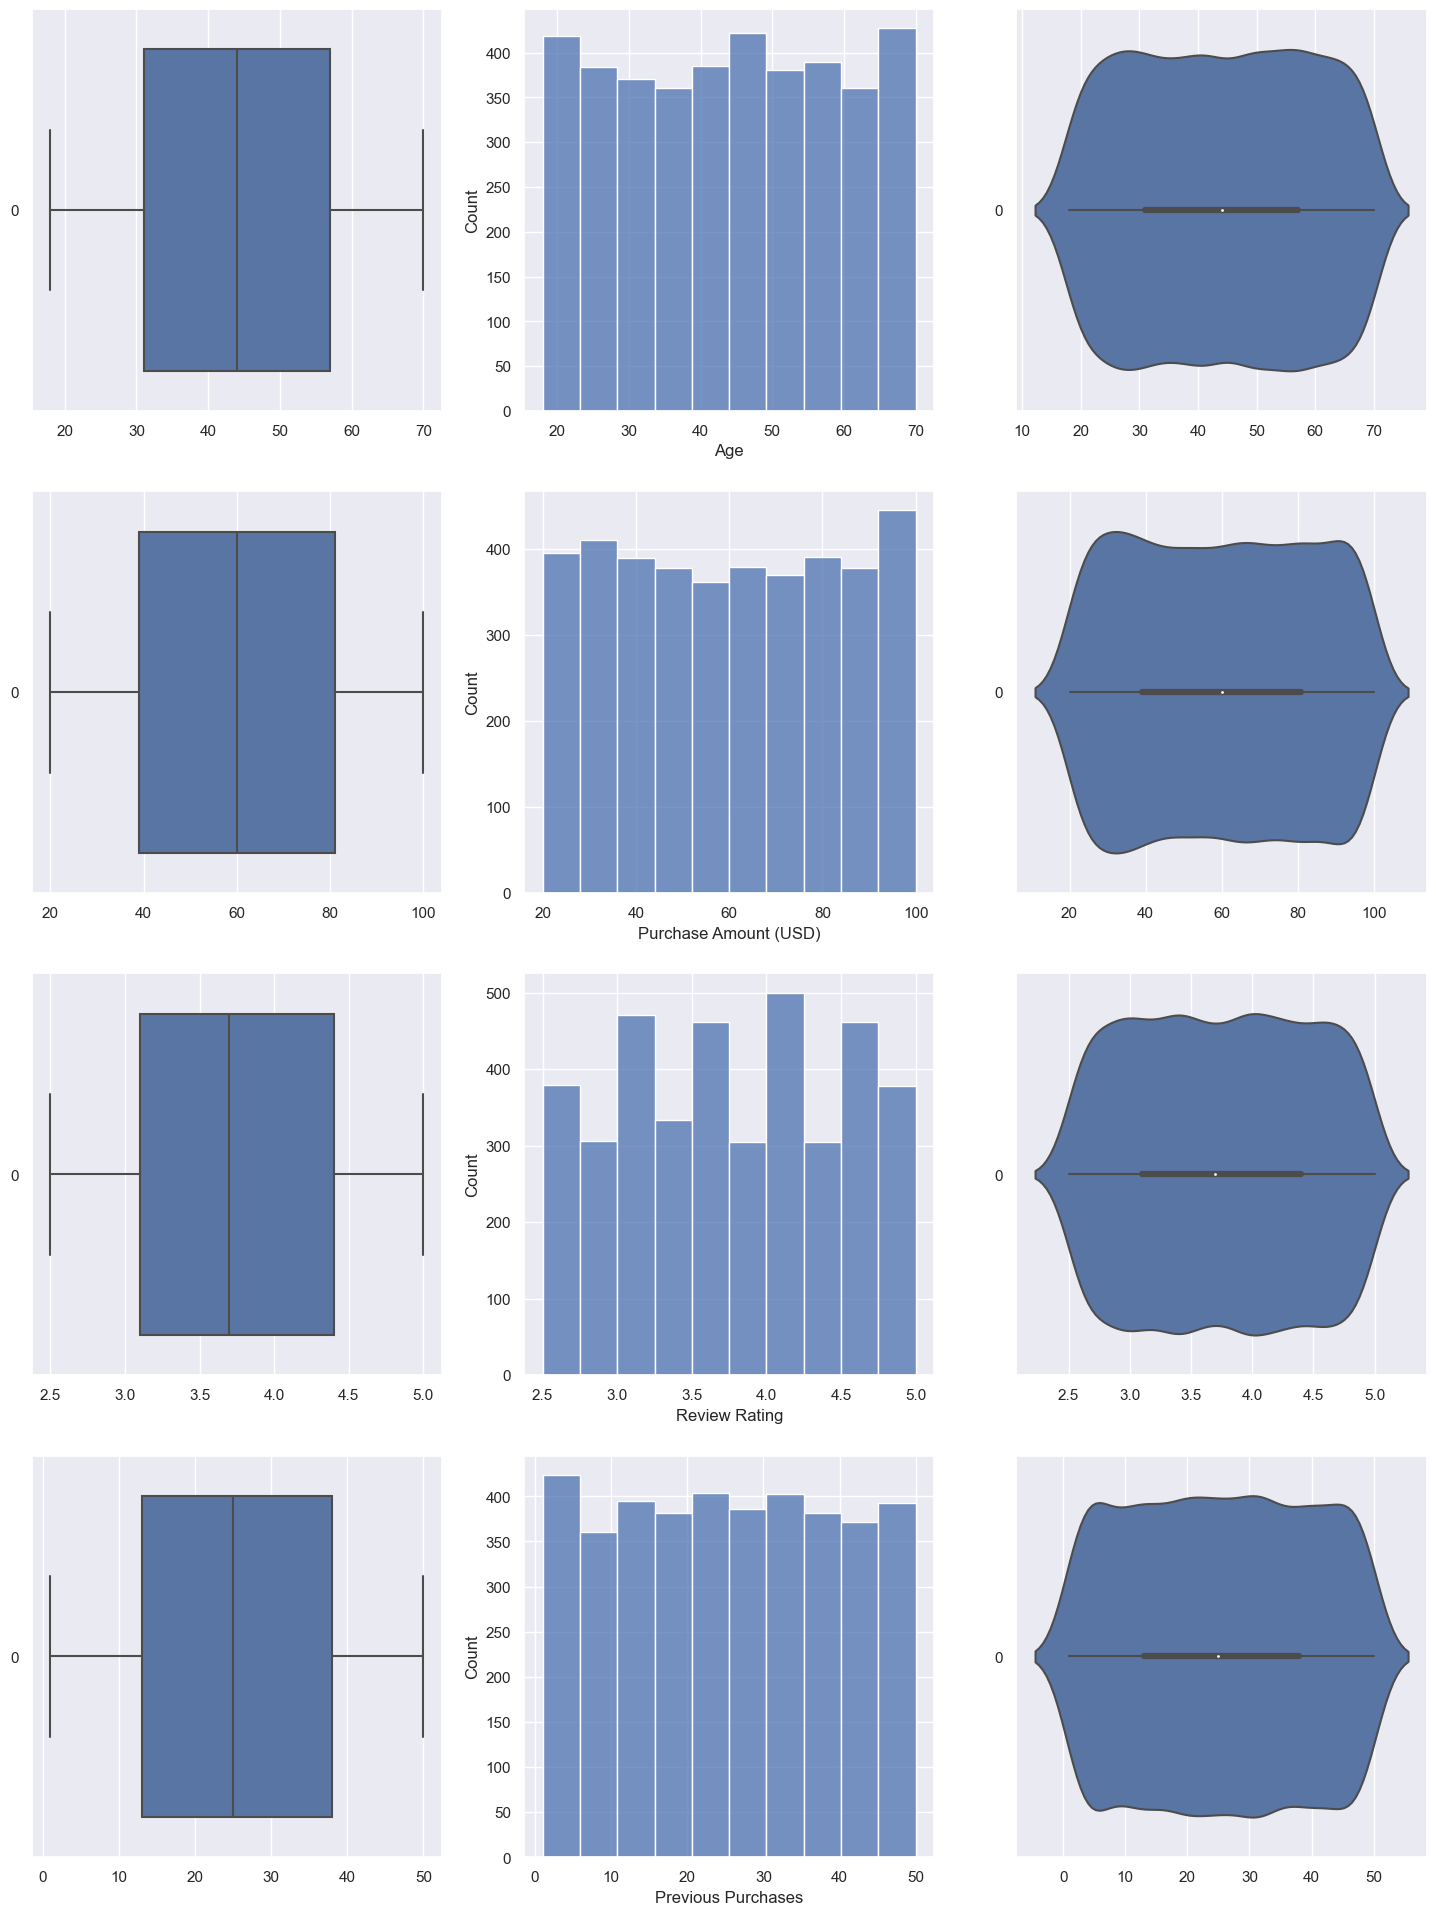

In [3]:
numeric_data = pd.DataFrame(df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]])

# Summary Statistics for all Variables
summary_stats = numeric_data.describe().round(2)
print(summary_stats)

# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data=numeric_data[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=numeric_data[var], bins=10, ax=axes[count, 1])  # Change the number of bins here
    sb.violinplot(data=numeric_data[var], orient="h", ax=axes[count, 2])
    count += 1

plt.show()

# Insights
# This just shows the numeric variables against the count. There are a few insights shown, for example, most of the purchases are between 3 and 4.5.




## Based on the plots above:

## Age
Age is almost uniformly distributed as seen in the histogram. There are no outliers as shown on the boxplt.

## Purchase amount
Price is also almost uniformly distributed. However, based on the boxplot, it is evident that 50% of the data lies between $40 to $60. This shows that there is a small range and there is not much variation in pricing.

## Review rating
As shown in boxplot,  50% of the data lies between 3 to 4.5 stars. It suggests that buyers might be looking into the ratings before the purchase.

## Previous Purchases

Price is almost uniformly distributed amongst the ferquency of previous purchases.  This tells us that the variable previous purchases might not be too useful.



Note: In the context of age, smaller bins provide a more accurate representation of age groups, capturing more datapoints that are skewed or outliers to the graph. This helps better reflect the shape of the dataset relative to the feature providing us with a better idea of what is relevant

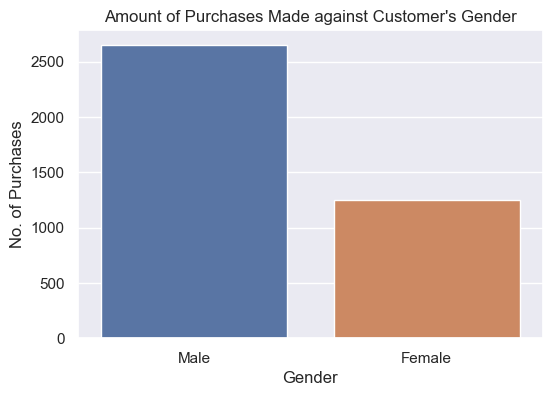

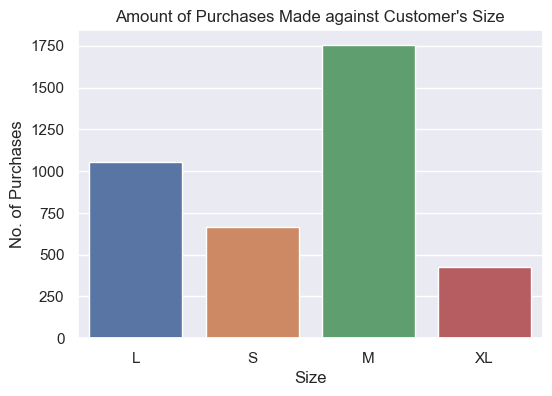

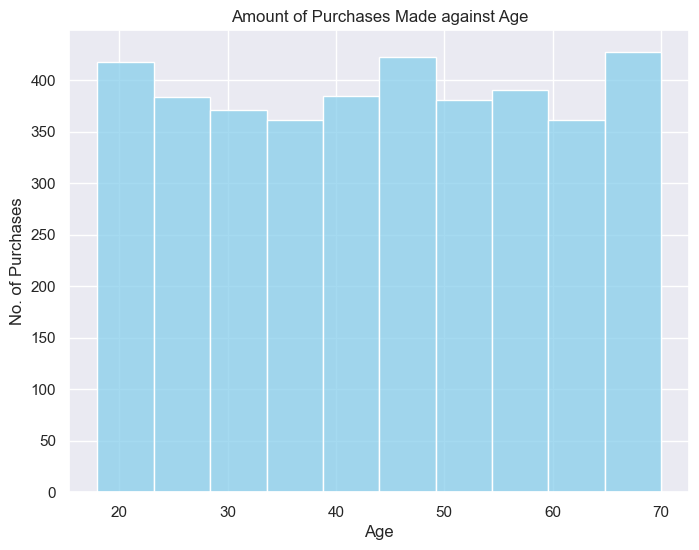

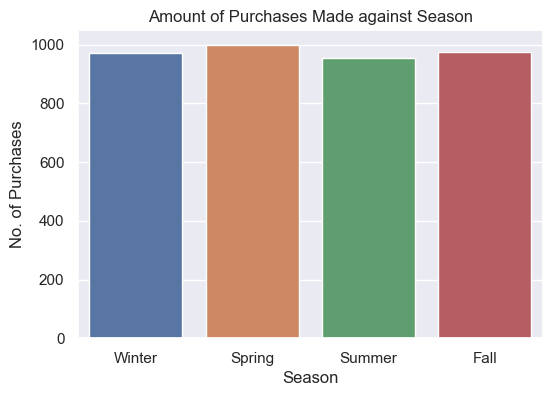

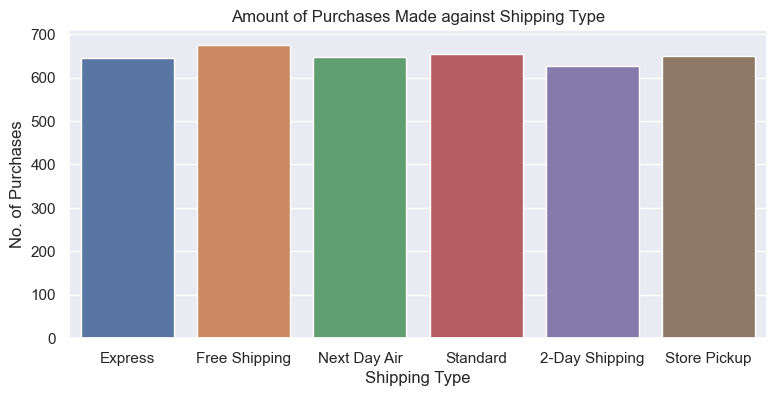

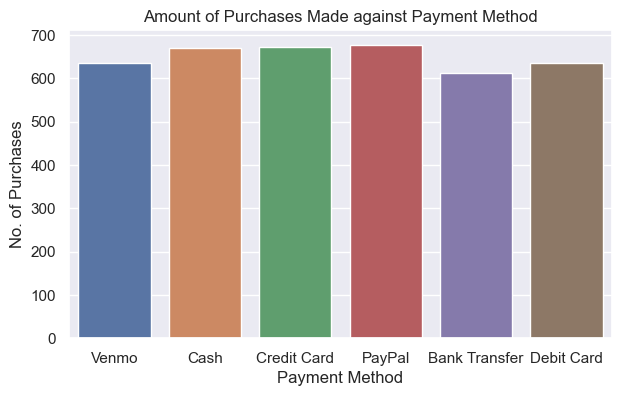

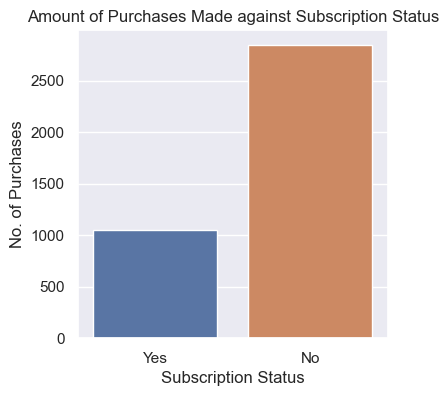

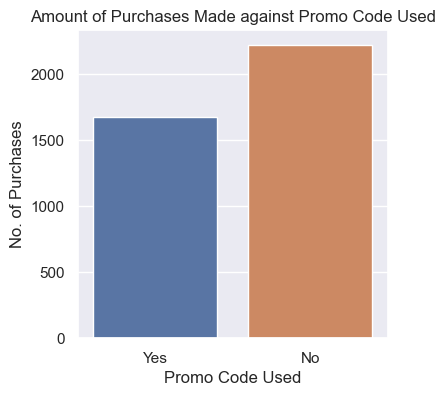

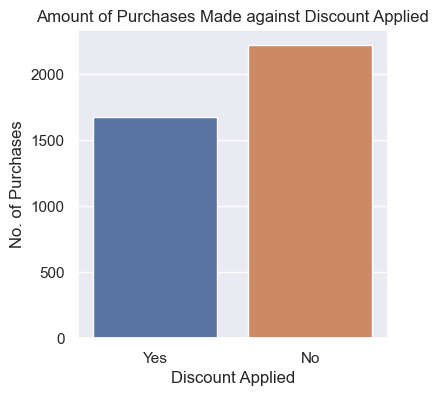

Difference between males and females: 1404


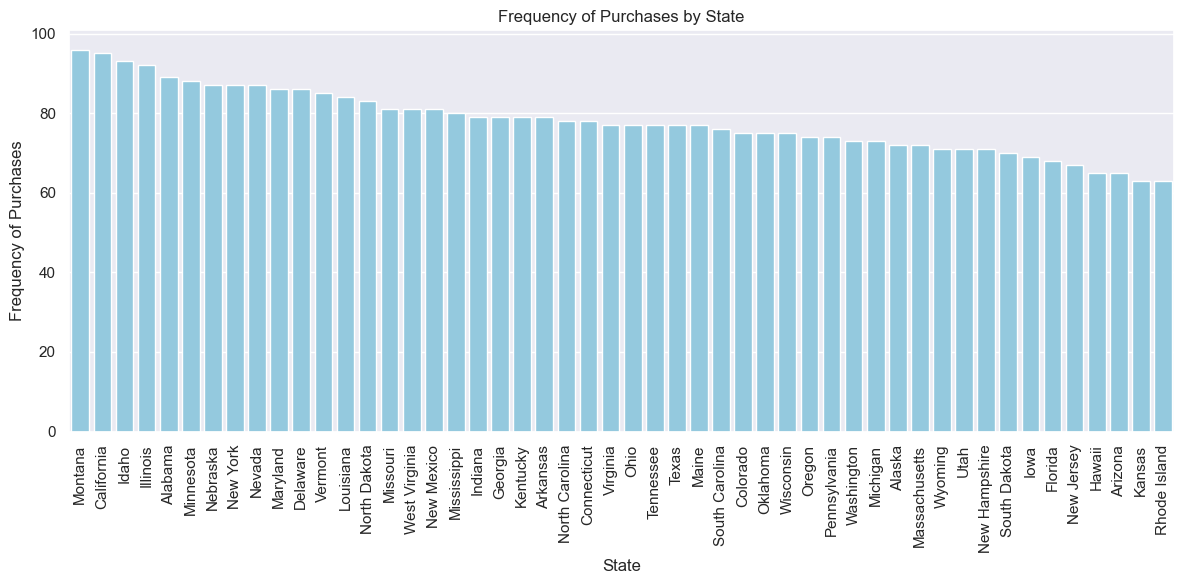

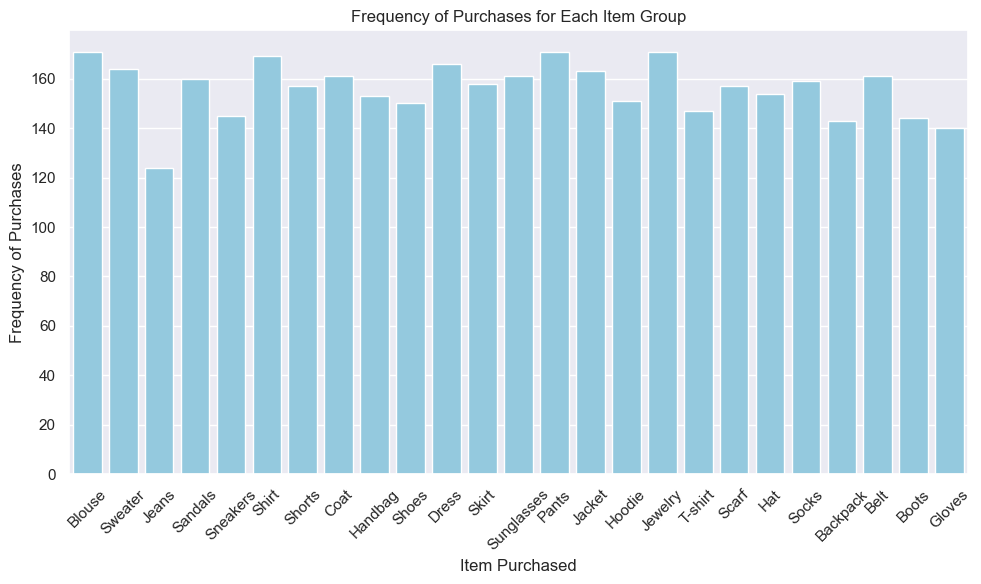

In [4]:
#Univariate 
#plotting the variables against the no. of purchases

plt.figure(figsize=(6, 4))
sb.countplot(x='Gender',data=df)
plt.title("Amount of Purchases Made against Customer's Gender")
plt.xlabel('Gender')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(6, 4))
sb.countplot(x='Size',data=df)
plt.title("Amount of Purchases Made against Customer's Size")
plt.xlabel('Size')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(8, 6)) 
sb.histplot(data=df, x='Age', bins=10, color='skyblue') 
plt.title("Amount of Purchases Made against Age")
plt.xlabel('Age')
plt.ylabel('No. of Purchases')
plt.show()


plt.figure(figsize=(6, 4))
sb.countplot(x='Season',data=df)
plt.title("Amount of Purchases Made against Season")
plt.xlabel('Season')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(9, 4))
sb.countplot(x='Shipping Type',data=df)
plt.title("Amount of Purchases Made against Shipping Type")
plt.xlabel('Shipping Type')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(7, 4))
sb.countplot(x='Payment Method',data=df)
plt.title("Amount of Purchases Made against Payment Method")
plt.xlabel('Payment Method')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(4, 4))
sb.countplot(x='Subscription Status',data=df)
plt.title("Amount of Purchases Made against Subscription Status")
plt.xlabel('Subscription Status')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(4, 4))
sb.countplot(x='Promo Code Used',data=df)
plt.title("Amount of Purchases Made against Promo Code Used")
plt.xlabel('Promo Code Used')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(4, 4))
sb.countplot(x='Discount Applied',data=df)
plt.title("Amount of Purchases Made against Discount Applied")
plt.xlabel('Discount Applied')
plt.ylabel('No. of Purchases')
plt.show()
#
#There seems to be a huge difference in data between male and females through this code we can find out exactly how many more males there are than females.
gender_counts = df['Gender'].value_counts()
male_count = gender_counts.get('Male', 0) 
female_count = gender_counts.get('Female', 0) 
difference = abs(male_count - female_count)
print("Difference between males and females:", difference)
#This shows that we have to balance the dataset, we will be experimenting further later when we data clean it.


plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sb.countplot(x='Location', data=df, order=df['Location'].value_counts().index, color = 'skyblue')
plt.title('Frequency of Purchases by State')
plt.xlabel('State')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

plt.figure(figsize=(10, 6)) 
sb.countplot(x='Item Purchased', data=df, color='skyblue')
plt.title('Frequency of Purchases for Each Item Group')
plt.xlabel('Item Purchased')
plt.ylabel('Frequency of Purchases')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()



## Based on the frequency plots above:

## Gender
Male have twice more number of purchases than females. This may tell us that many of the accounts are signed up as males. This information does not tell us that there are more male buyers than female buyers as male accounts are also able to purhcase female products.

## Size 
The highest frequency of customer size is M, followed by L then S, and lastly XL. This is useful as it informs sellers to produce their clothing size based on these ratios to maximize sales, and to know which of these sizes to have more in stock , generally. 

## Age

Although the age seems to be evenly distributed, based on domain knowledge, we suspect that it might play an important role in determining a frequency.

## Season
The seasons are almost uniformly distributed against the number of purchases. This implies that purchases are done throughout the year almost evenly.

## Shipping Type

As expected, free shipping has the most number of purchases. However, the other shipping types do not have a big difference. This hints that generally, consumers are more likely to purchase if there is free shipping.

## Payment Method
The payments are also uniformly distributed, suggesting there is no bias.

## Subscription status
This data just informs us of the number of purchases by buyers with and without a subscription. This information shows that most of the buyers are not subscribed. Contuary to convention where we would expect buyers to be subscribed to a platform for incentives provided by them.

## Promo code
This shows that there is a high number of purchases when promo codes are used and not used. This shows that in general promo codes may not be as efficient as sellers think they are. 

## Discount applied
The discount applied graph shows that it is similar to the promo code. 
The difference between males and females is 1404 this suggests that we should clean and prepare the data so that it is more balanced.

## Location

The location count against frequency has a clear trend. Unlike the others, we can see a declining slope from the different states above. This may suggest that some states have higher purchasing activity than the others. 

In [5]:
# Investigating regional category trends
category_counts = df.groupby("Location")["Category"].value_counts()
print("Regional Category Trends:\n", category_counts)

# Grouping data by location
location_groups = df.groupby("Location")

# Analyzing regional trends
for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")
    
    # Calculating average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Average Purchase Amount: ${avg_purchase_amount:.2f}")
    
    # Identifying the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Most Popular Category: {popular_categories}")
    print("\n")
    
# Filter data for Clothing category
clothing_data = df[df["Category"] == "Clothing"]

# Find the region with the highest average spending in Clothing category
highest_spending_region_clothing = clothing_data.groupby("Location")["Purchase Amount (USD)"].mean().idxmax()

# Calculate the average spending in the highest spending region for Clothing category
average_spending_highest_region_clothing = clothing_data.groupby("Location")["Purchase Amount (USD)"].mean().max()

# Print the findings
print(f"In {highest_spending_region_clothing}, shoppers display a strong inclination for clothing, with an average purchase amount of ${average_spending_highest_region_clothing:.2f}")

Regional Category Trends:
 Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64
Regional Trends for Alabama:
Average Purchase Amount: $59.11
Most Popular Category: Clothing


Regional Trends for Alaska:
Average Purchase Amount: $67.60
Most Popular Category: Clothing


Regional Trends for Arizona:
Average Purchase Amount: $66.55
Most Popular Category: Clothing


Regional Trends for Arkansas:
Average Purchase Amount: $61.11
Most Popular Category: Clothing


Regional Trends for California:
Average Purchase Amount: $59.00
Most Popular Category: Clothing


Regional Trends for Colorado:
Average Purchase Amount: $56.29
Most Popular Category: Clothing


Regional Trends fo

                            Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000000              -0.010424      -0.021949   
Purchase Amount (USD) -0.010424               1.000000       0.030776   
Review Rating         -0.021949               0.030776       1.000000   
Previous Purchases     0.040445               0.008063       0.004229   

                       Previous Purchases  
Age                              0.040445  
Purchase Amount (USD)            0.008063  
Review Rating                    0.004229  
Previous Purchases               1.000000  


<Axes: >

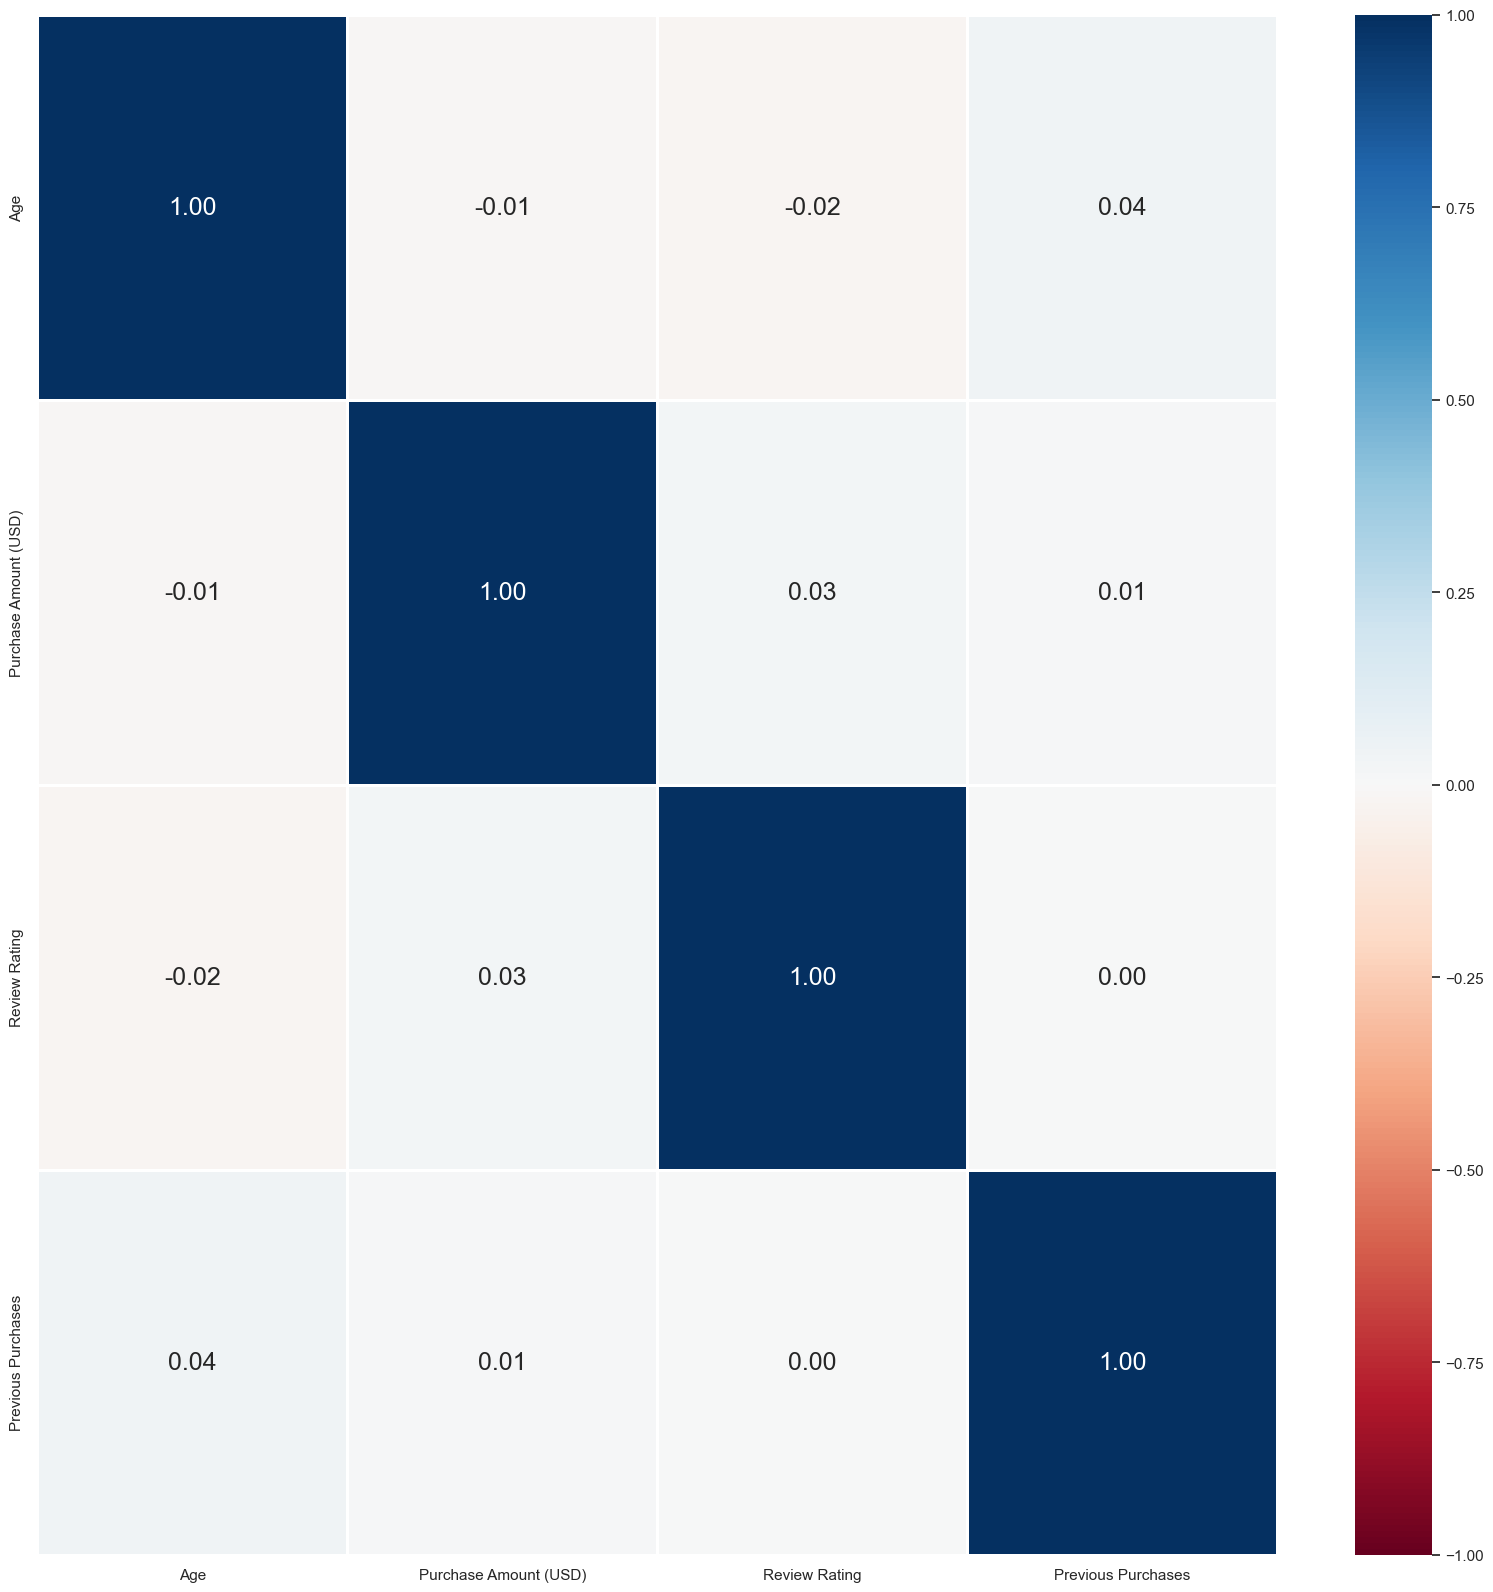

In [6]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

It is evident that no numeric variables have significant correlation with another.


## 3. Data Preperation

Challenges : Mainly we needed to use multiple categorical variable to predict a categorical variable, and there was significant difference in the count for genders, hence umsampling was used. We then considered users who who categorised under weekly, bi weekly, fortnightly as "TRUE" in the High Freuqency column.

Techniques like one-hot encoding was used.
In this section we explore the methods to clean the data and prepare the datafrane for our model.
First , we check for NULL values.

In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

As seen above, the dataset does not contain null values. 
Next, we check for duplicates.

In [8]:
value=len(df[df.duplicated()])
print("Duplicates: ", value) 

Duplicates:  0


As seen above, there are do duplicates in our dataset.
We classify a frequent user as someone who purchases anytime within weekly, bi-weekly, and fort-nightly. We will need to create a new column to classify them under a T/F column.


## Inserting a T/F Column to group frequent users (weekly, bi weekly, fortnightly)

In [9]:
target_feature = "High Frequency"
frequency_conditions = "Bi-Weekly", "Weekly", "Fortnightly"
df[target_feature] = df["Frequency of Purchases"].isin(frequency_conditions)
df

numeric_features = ["Age","Purchase Amount (USD)", "Previous Purchases"]
categoric_values = ["Gender","Item Purchased", "Category", "Location", "Size", "Color", "Season", "Review Rating", "Subscription Status", "Shipping Type", "Discount Applied", "Promo Code Used", "Payment Method", "Frequency of Purchases"]
categoric2_values = ["Gender","Item Purchased", "Category", "Location", "Size", "Color", "Season", "Review Rating", "Subscription Status", "Shipping Type", "Discount Applied", "Promo Code Used", "Payment Method"]

df = pd.DataFrame(df)
df2 = df
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method  \
0                Yes                  14          Venmo   
1                Yes                   2           Cash   
2                Yes                  23    Credit Card   
3                Yes                  49         PayPal   
4                Yes                  31         PayPal   
...              ...                 ...            ...   
3895              No                  32          Venmo   
3896              No                  41  Bank Transfer   
3897              No                  24          Venmo   
3898              No                  24          Venmo   
3899              No                  33          Venmo   

     Frequency of Purchases  High Frequency  
0               Fortnightly            True  
1               Fortnightly            True  
2                    Weekly            True  
3                    Weekly            True  
4                  Annually           False  
...                     ...             ...  
3895                 Weekly            True  
3896              Bi-Weekly            True  
3897              Quarterly           False  
3898                 Weekly            True  
3899              Quarterly           False  

[3900 rows x 19 columns]

## Upsampling for imbalance
After conducting exploratory data analysis (EDA), we observed a significant gender imbalance in the dataset. Consequently, we opted to address this by employing up-sampling techniques to balance the data. By increasing the number of minority class instances, we can ensure that the model has enough data to learn meaningful patterns and improve its ability to distinguish between classes.

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
# Separate features and labels
X = df.drop('Gender', axis=1) 
y = df['Gender']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Perform random oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Gender'] = y_resampled

In [12]:
gender_counts = df_resampled['Gender'].value_counts()

In [13]:
print(gender_counts)


Gender
Male      2652
Female    2652
Name: count, dtype: int64



## Converting categorical variables with more than two sub-categories into one-hot encoded columns.


In [14]:
# Establish Feature Labels & Outline Target Feature
target_feature = "High Frequency"
frequency_conditions = "Bi-Weekly", "Weekly", "Fortnightly"
df_resampled[target_feature] = df_resampled["Frequency of Purchases"].isin(frequency_conditions)

lfreq_df = df_resampled[~df_resampled["Frequency of Purchases"].isin(frequency_conditions)] # DF of only Low Frequency
hfreq_df = df_resampled[df_resampled["Frequency of Purchases"].isin(frequency_conditions)] # DF of only High Frequency
df = df_resampled.drop(["Customer ID","Frequency of Purchases"],axis=1)

male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']


numeric_features = ["Age","Purchase Amount (USD)", "Previous Purchases"]
categoric_features = ["Gender","Item Purchased", "Category", "Location", "Size", "Color", "Season", "Review Rating", "Subscription Status", "Shipping Type", "Discount Applied", "Promo Code Used", "Payment Method"]

cleaned_df = pd.get_dummies(df, columns=categoric_features) # Hot One Encode Categorical Variables


### BiVariate exploration for important features



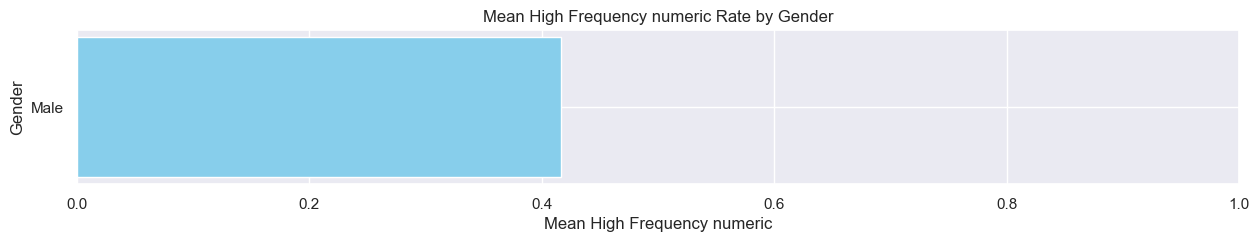

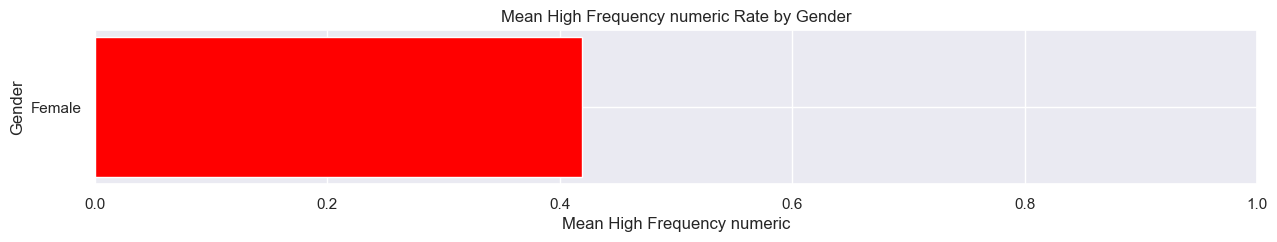

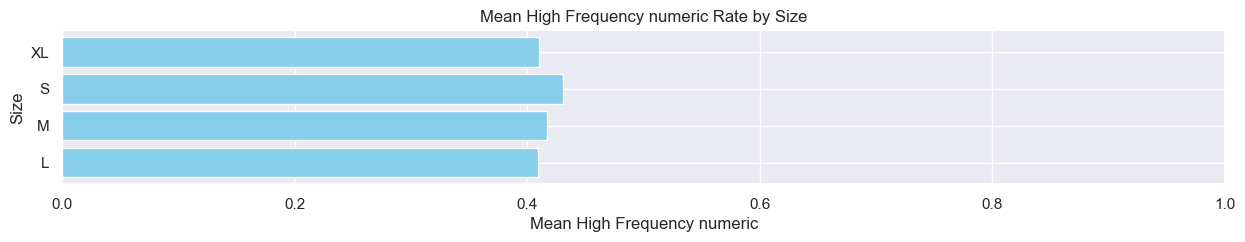

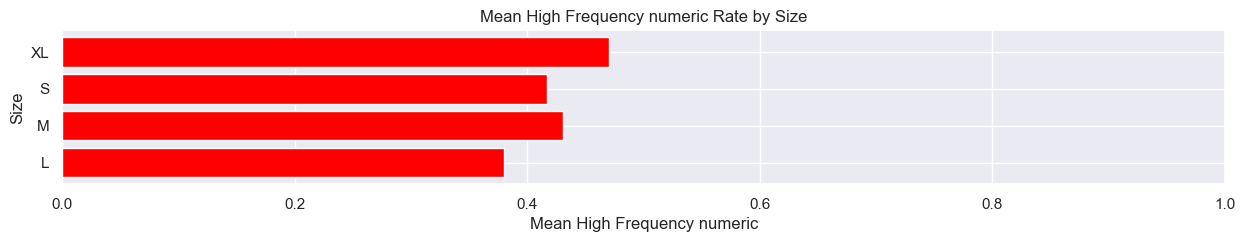

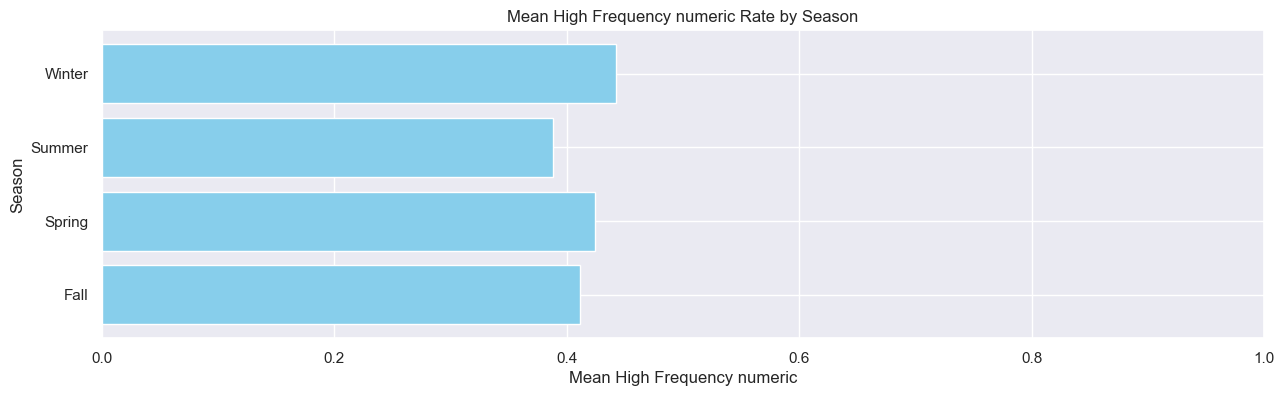

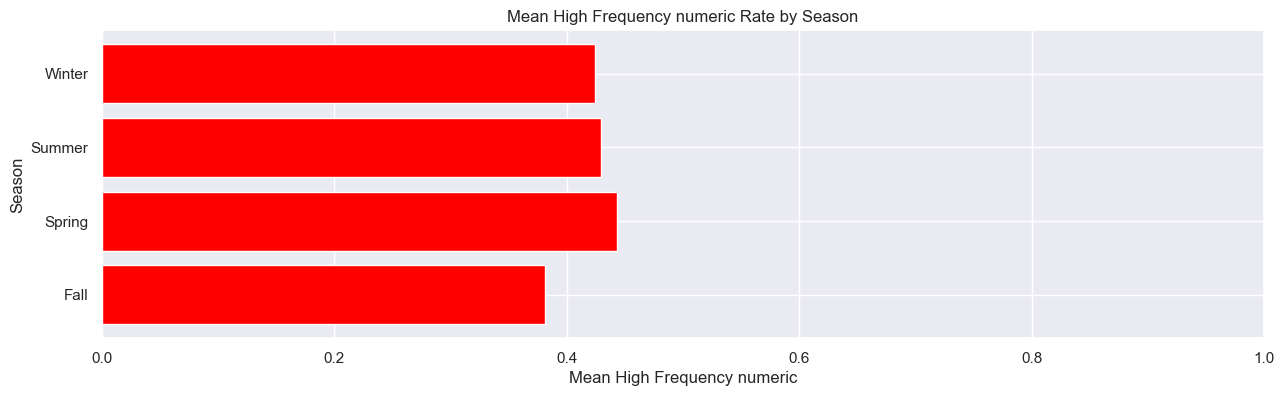

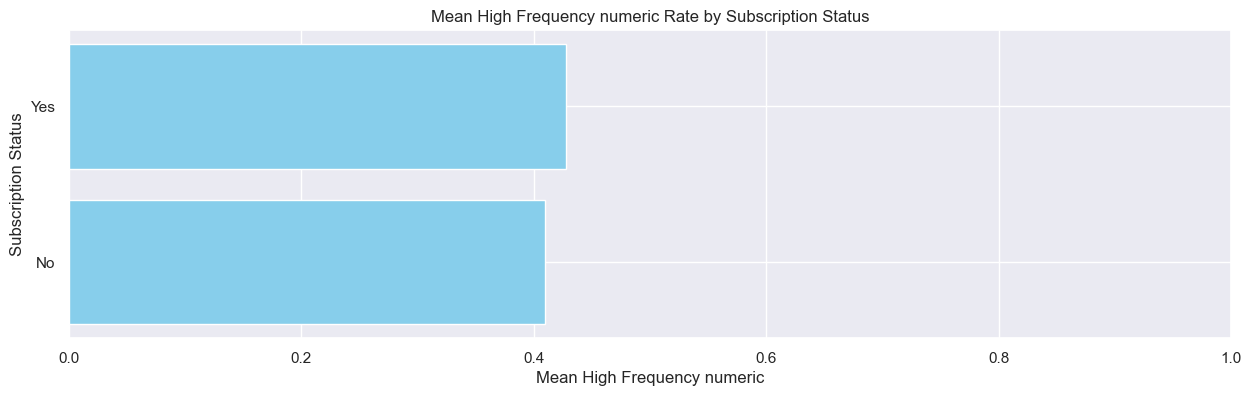

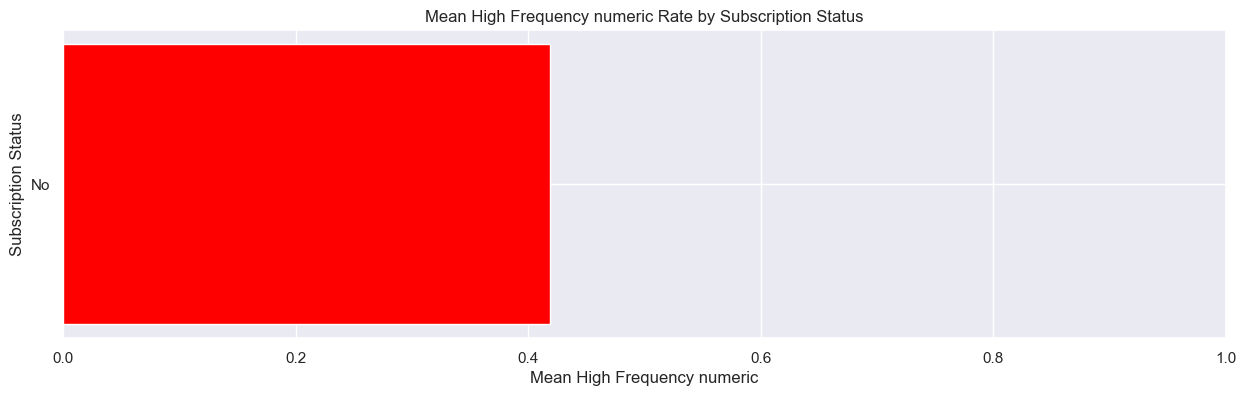

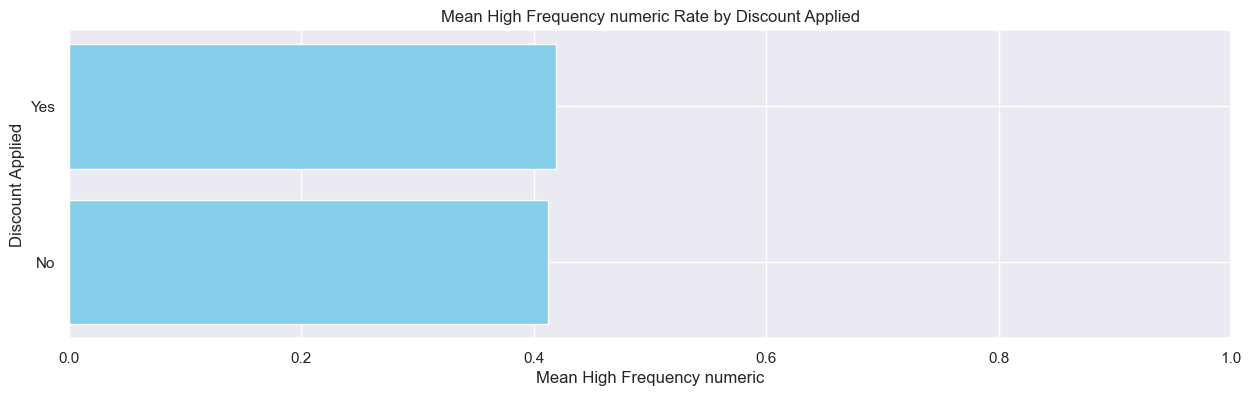

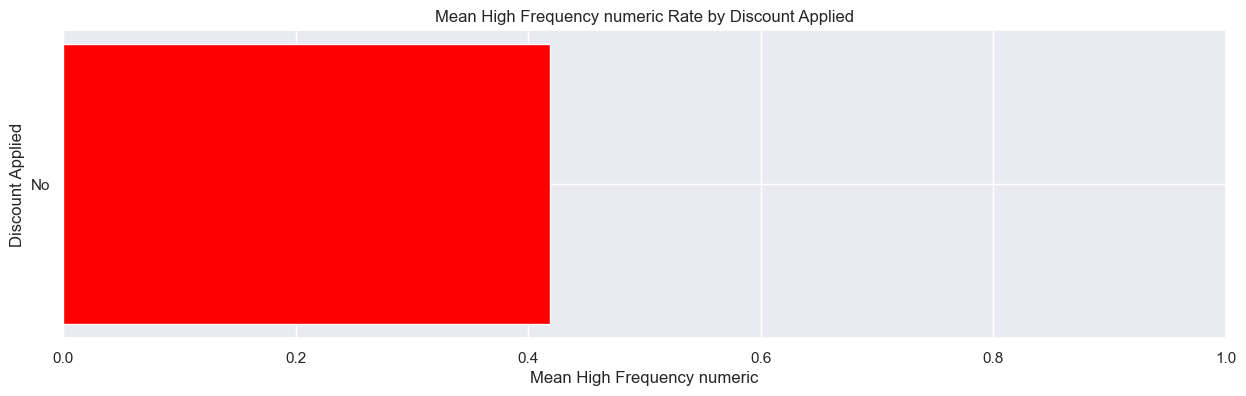

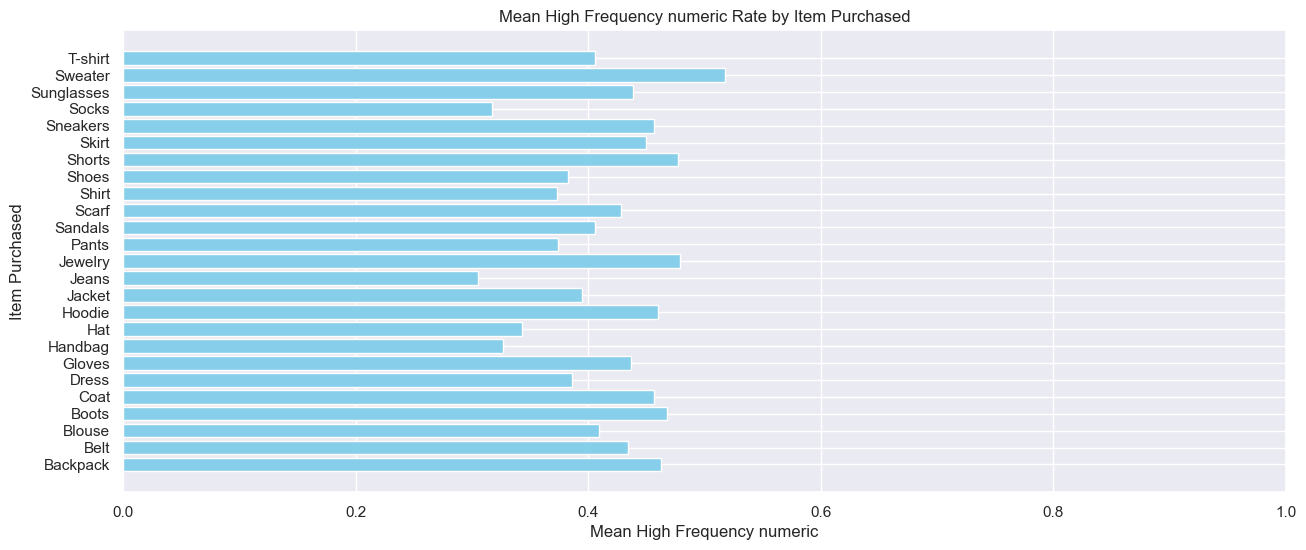

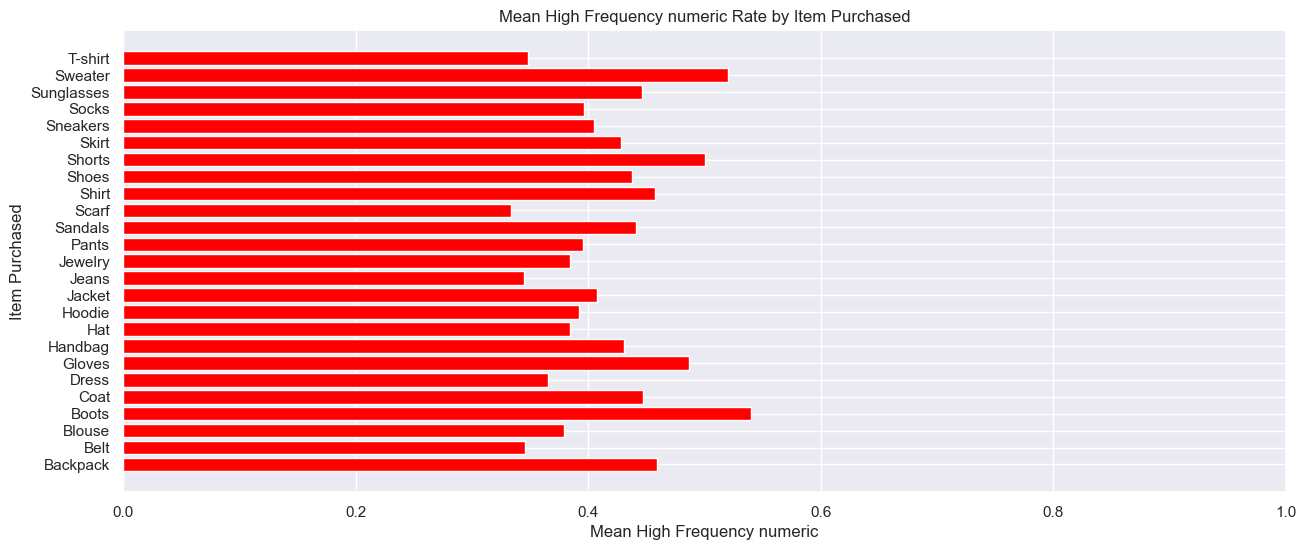

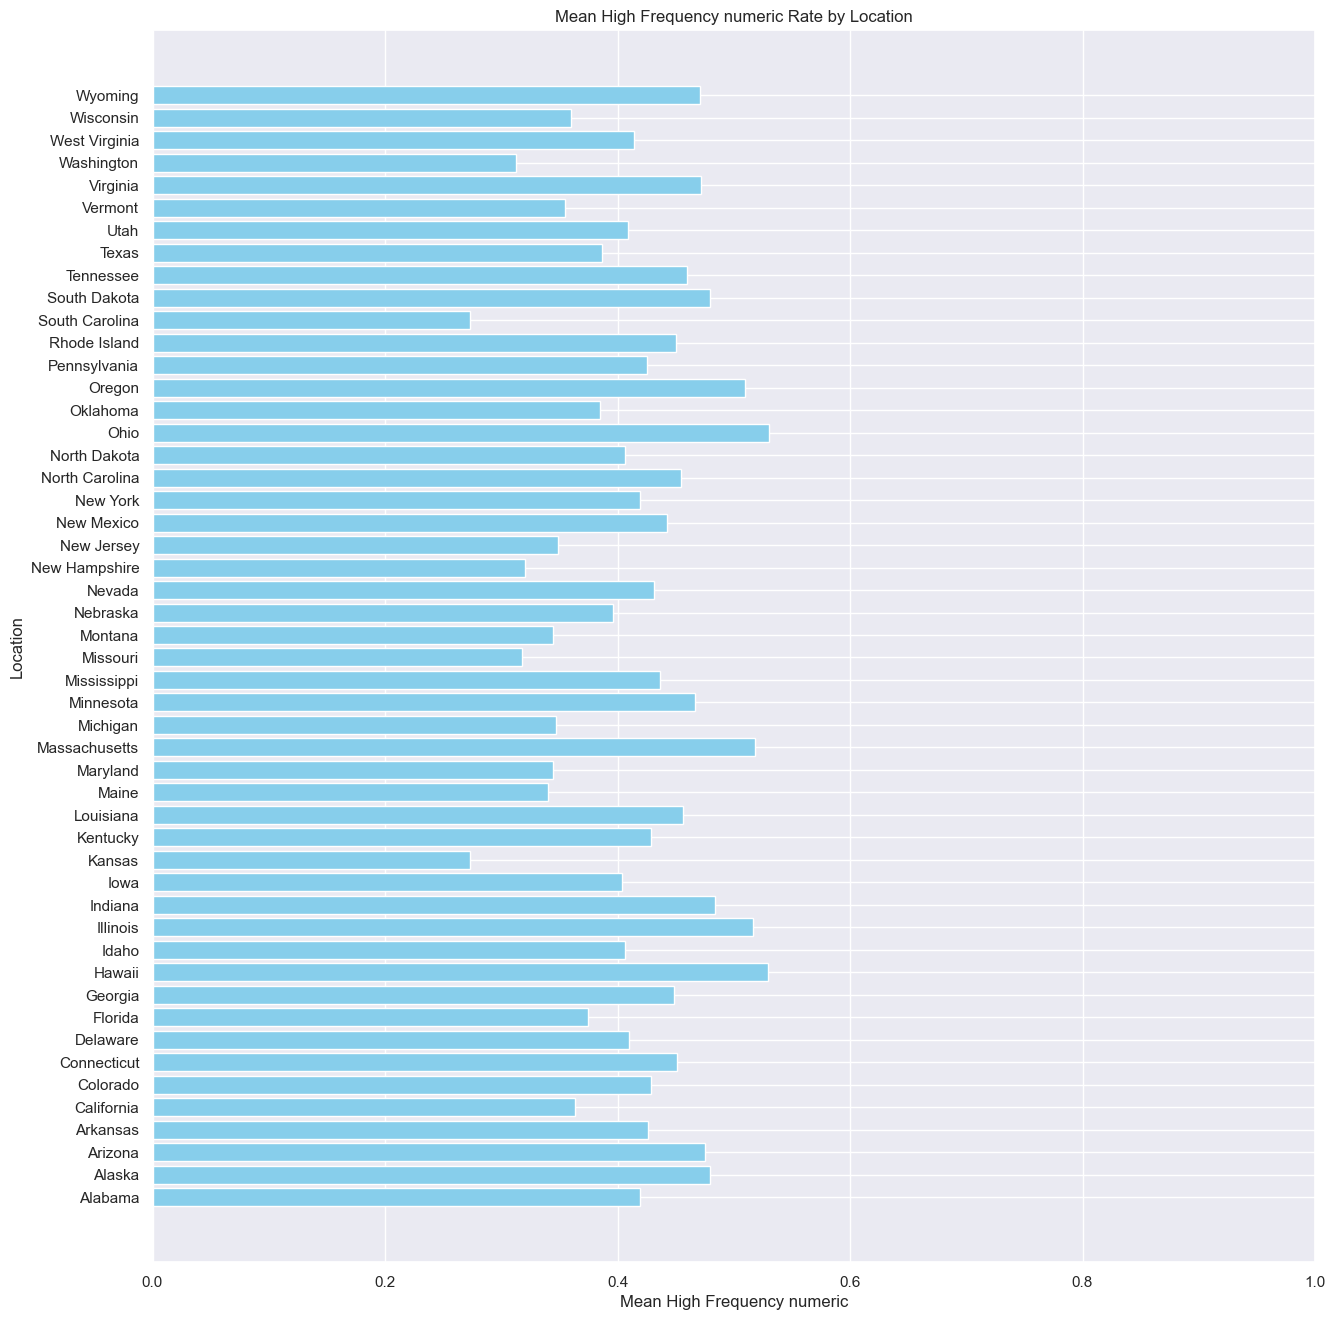

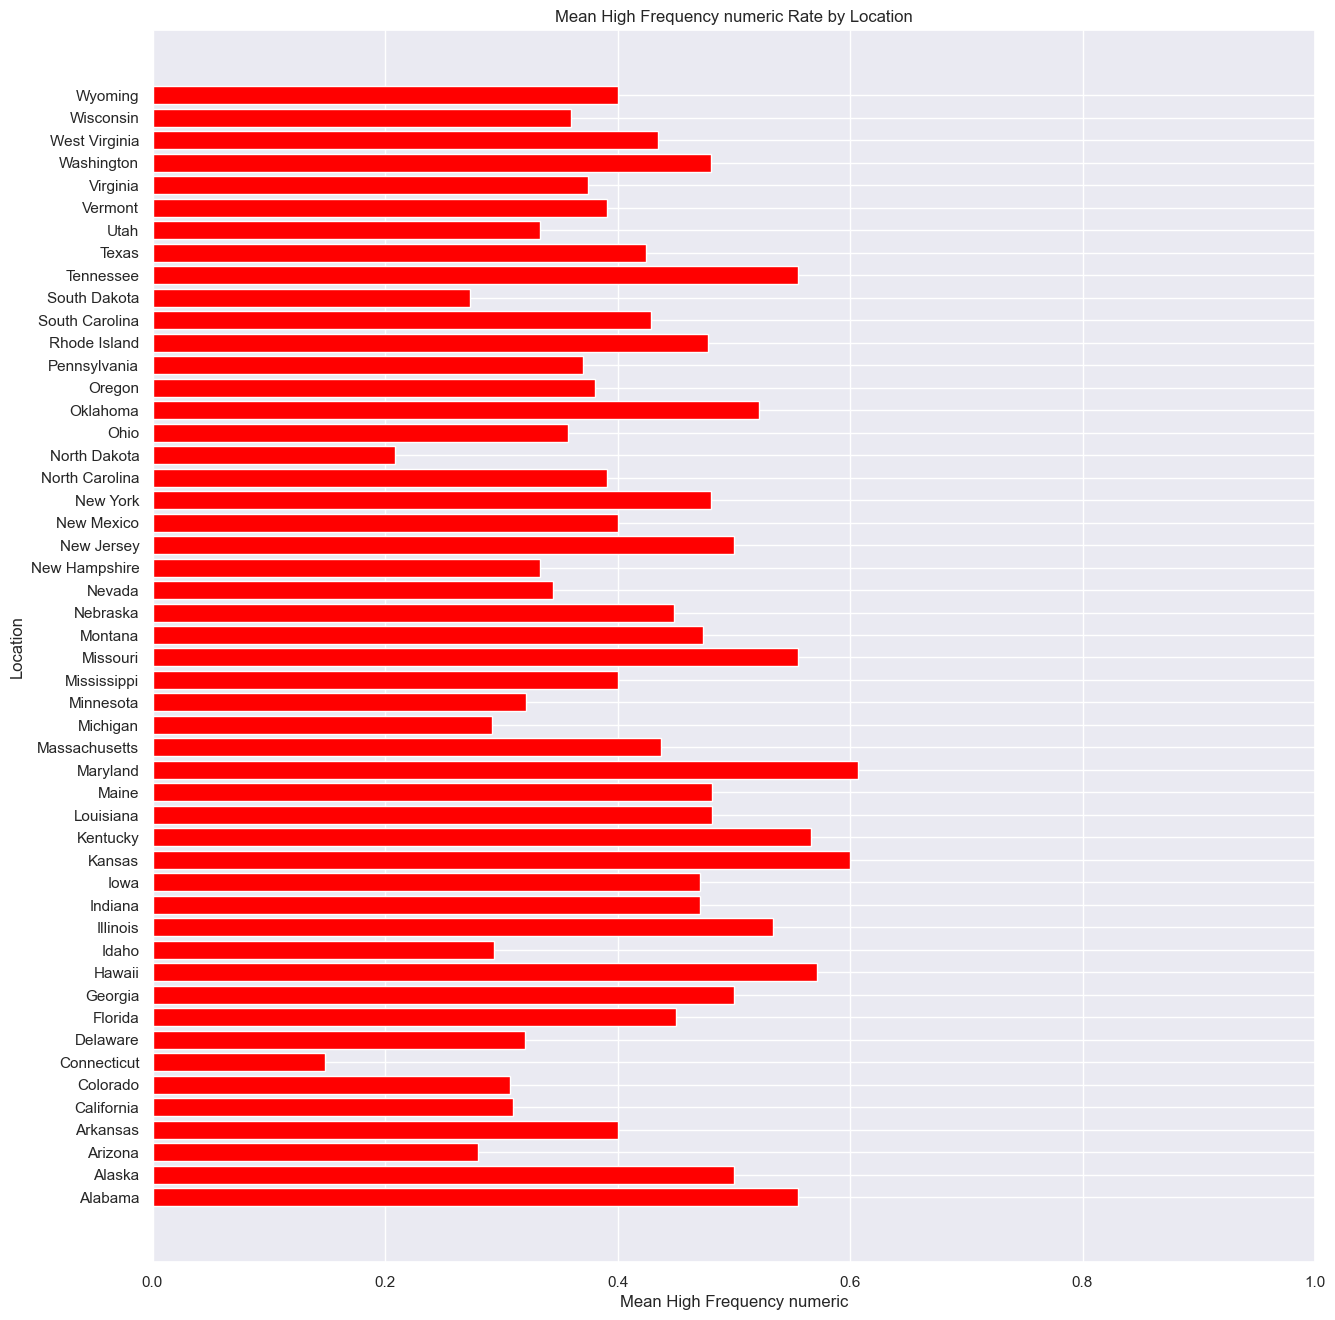

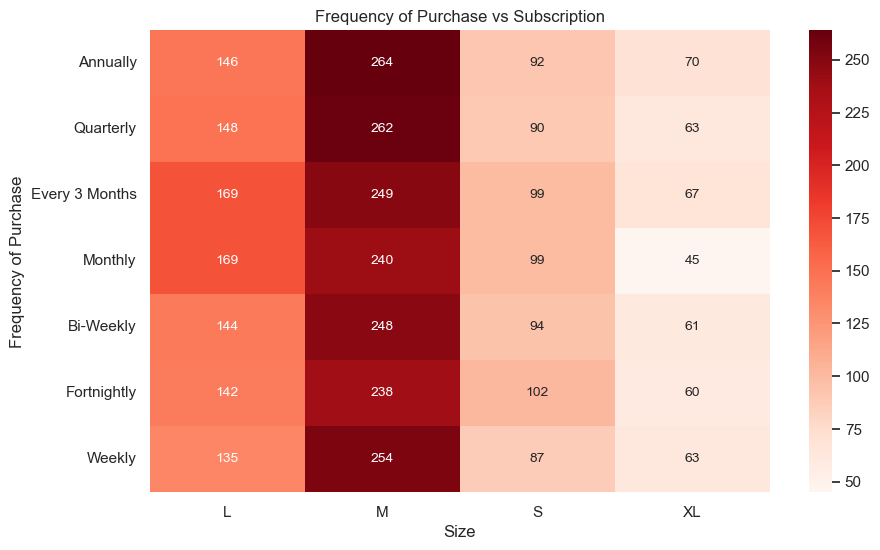

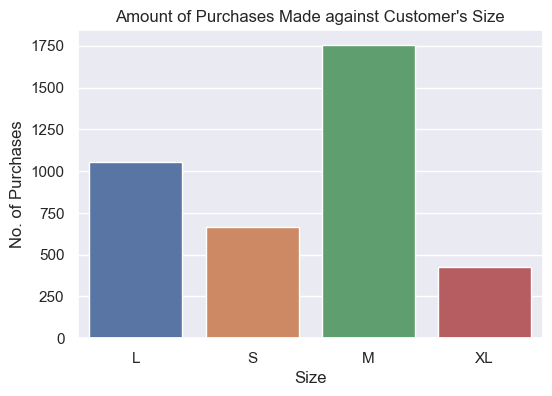

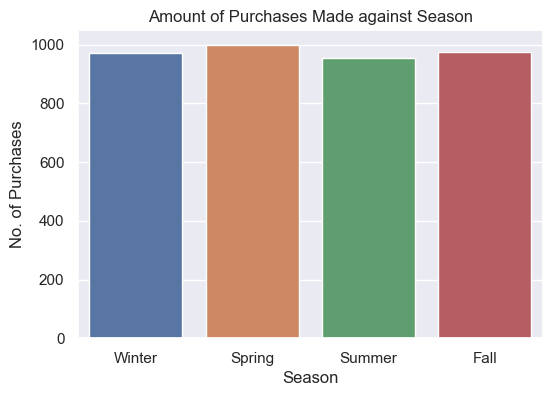

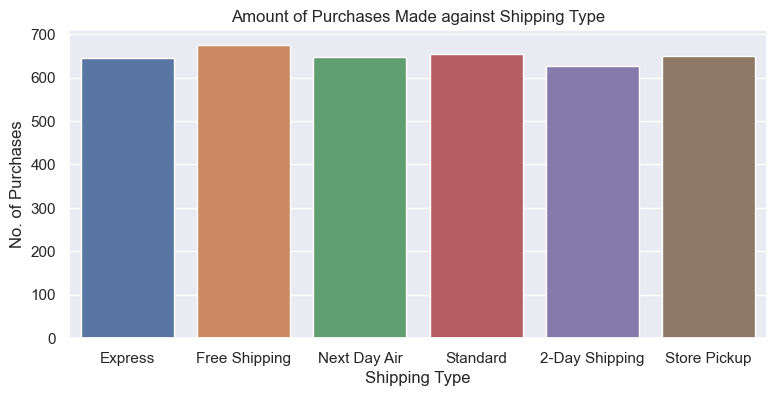

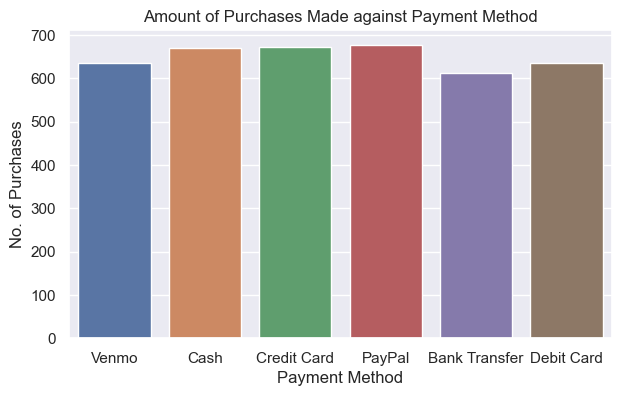

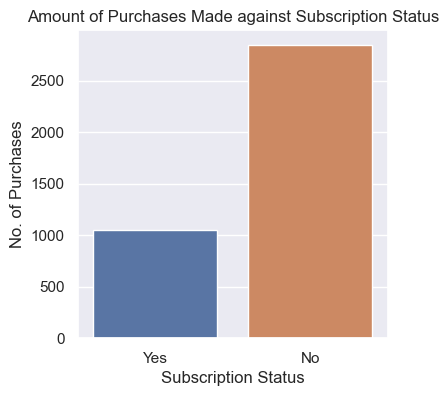

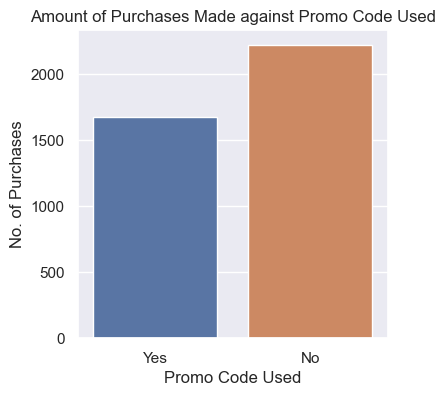

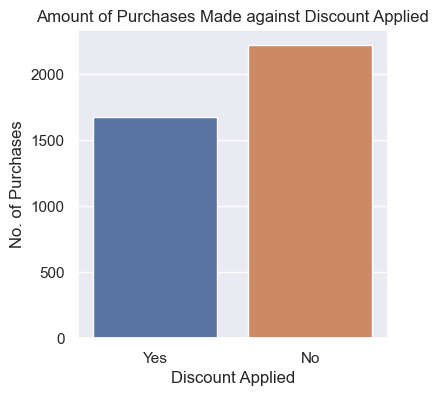

In [15]:

df2[f"{target_feature} numeric"] = df2['High Frequency'].astype(int)
def bivariate_plot_rate(figure_size,dataframe,target_name,feature_name,color):
    plt.figure(figsize=figure_size)
    hfreq_rate = dataframe.groupby(feature_name)[target_name].mean()
    plt.barh(hfreq_rate.index, hfreq_rate.values, color=color)
    plt.xlabel(f'Mean {target_name}')
    plt.ylabel(feature_name)
    plt.title(f'Mean {target_name} Rate by {feature_name}')
    plt.xlim(0, 1)
    plt.show()

plot_feature_list = [['Gender',(15, 2)],['Size',(15, 2)],['Season',(15, 4)],['Subscription Status',(15, 4)],
                     ['Discount Applied',(15, 4)],['Item Purchased',(15, 6)],['Location',(15, 16)]]
for feature in plot_feature_list:
    bivariate_plot_rate(feature[1],df2[df2['Gender']=='Male'],f"{target_feature} numeric",feature[0],'skyblue')
    bivariate_plot_rate(feature[1],df2[df2['Gender']=='Female'],f"{target_feature} numeric",feature[0],'red')



frequency_order = ["Annually", "Quarterly", "Every 3 Months", "Monthly", "Bi-Weekly","Fortnightly","Weekly"]
df2['Frequency of Purchases'] = pd.Categorical(df2['Frequency of Purchases'], categories=frequency_order, ordered=True)
pivot_table = df2.pivot_table(index='Frequency of Purchases', columns='Size', aggfunc='size', fill_value=0)
# Plot the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_table, annot=True, cmap='Reds', fmt='g', annot_kws={"size": 10})  # 'fmt=g' to format annotations as integers
plt.title('Frequency of Purchase vs Subscription')
plt.xlabel('Size')
plt.ylabel('Frequency of Purchase')
plt.show()



plt.figure(figsize=(6, 4))
sb.countplot(x='Size',data=df2)
plt.title("Amount of Purchases Made against Customer's Size")
plt.xlabel('Size')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(6, 4))
sb.countplot(x='Season',data=df2)
plt.title("Amount of Purchases Made against Season")
plt.xlabel('Season')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(9, 4))
sb.countplot(x='Shipping Type',data=df2)
plt.title("Amount of Purchases Made against Shipping Type")
plt.xlabel('Shipping Type')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(7, 4))
sb.countplot(x='Payment Method',data=df2)
plt.title("Amount of Purchases Made against Payment Method")
plt.xlabel('Payment Method')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(4, 4))
sb.countplot(x='Subscription Status',data=df2)
plt.title("Amount of Purchases Made against Subscription Status")
plt.xlabel('Subscription Status')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(4, 4))
sb.countplot(x='Promo Code Used',data=df2)
plt.title("Amount of Purchases Made against Promo Code Used")
plt.xlabel('Promo Code Used')
plt.ylabel('No. of Purchases')
plt.show()

plt.figure(figsize=(4, 4))
sb.countplot(x='Discount Applied',data=df2)
plt.title("Amount of Purchases Made against Discount Applied")
plt.xlabel('Discount Applied')
plt.ylabel('No. of Purchases')
plt.show()



### From the above plot, we gather some insights : 
In analyzing our dataset, we observed that the rate of high frequency consumers remained relatively stable across locations for males hovering at around 40%. However, for females, the rate displayed a more significant variability across different locations, suggesting that location served as a discernible predictor for female consumer behavior and indicating a potential for geographical nuances influences their high frequency consumption habits

## 4. Algortithm Optimisation

### 4a. Introduction to ML Techniques

In this section, we discuss the different ML techniques that we deemed relevant in finding solutions in our problem statement. Since our target variable in the scope of this project is a categorical one, we sought to use supervised learning classifier models: 
> 1. Decision Tree Classification:
>    
> Recursively splits the data based on features, forming tree-like structures where each internal node represents a decision based on a feature and cutoff, each node representing a class label. Decision trees are simple to understand and built, and while easy to interpret, can suffer from          overfitting if not properly constrained.

> 2. Random Forest Classifier (NEW)
>
> An ensemble learning method that builds and combines the predictions of multiple decision trees to improve accuracy and robustness of a model. Each tree being built from random subsets of training data and features, they are less prone to overfitting compared to individual decision trees. As such they often provide better generalized performance.


### 4b. Application to Problem Solving 
#### i. Determining the Important Features for our Model 
-insert here explain why we need to only put important features and how the accuracy would differ if we added everything and something about depth for trees 
-Simple decision tree classifier model with all relevant features to assess roughly what features might be important

Aggregated Feature Importance:
1. Location: 0.18234721481373486
2. Color: 0.14562644346823828
3. Review Rating: 0.13333787296660068
4. Item Purchased: 0.11183360162501041
5. Age: 0.07613973872091016
6. Previous Purchases: 0.07191281782274646
7. Purchase Amount (USD): 0.0646296265791882
8. Shipping Type: 0.04405514316175957
9. Payment Method: 0.04066213362631336
10. Season: 0.032128040360386224
11. Size: 0.030952095002765797
12. Gender: 0.02531173537506915
13. Category: 0.016458799920027887
14. Subscription Status: 0.011942897029635281
15. Discount Applied: 0.008987984074159142
16. Promo Code Used: 0.0036738554534545102


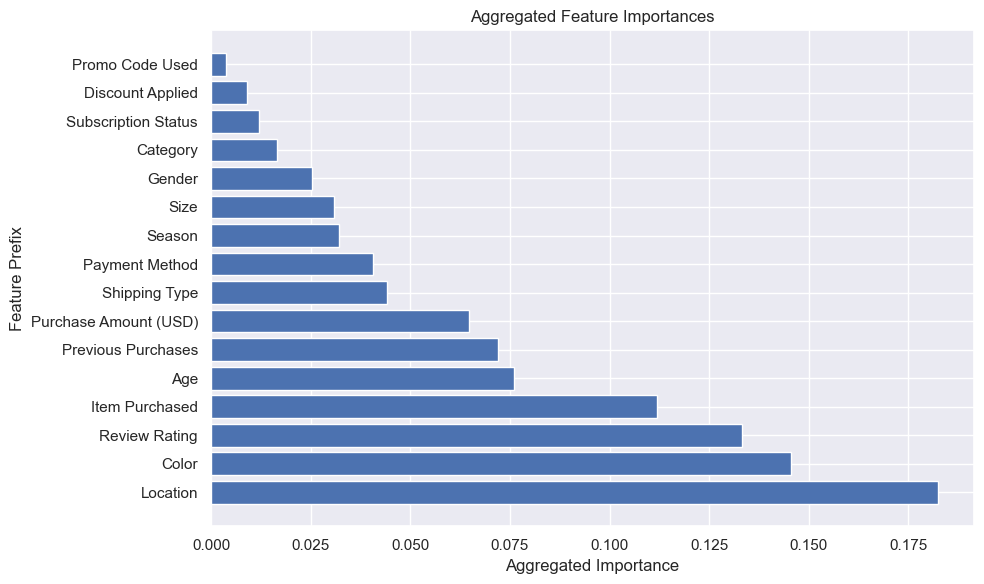

In [16]:
def calculate_feature_importance(dataframe, target_variable):
    # Separate predictor variables (X) and target variable (y)
    X = dataframe.drop(target_variable, axis=1)
    y = dataframe[target_variable]
    
    # Initialize decision tree classifier
    clf = DecisionTreeClassifier()
    
    # Fit the classifier to the data
    clf.fit(X, y)
    
    # Get feature importances
    importances = clf.feature_importances_
    features = X.columns
    
    # Initialize dictionary to store aggregated feature importances
    aggregated_feature_importances = {}
    
    # Iterate through features to aggregate importance based on prefix
    for feature, importance in zip(features, importances):
        prefix = feature.split('_')[0]
        if prefix not in aggregated_feature_importances:
            aggregated_feature_importances[prefix] = 0
        aggregated_feature_importances[prefix] += importance
    
    # Sort the aggregated feature importances
    sorted_aggregated_feature_importances = sorted(aggregated_feature_importances.items(), key=lambda x: x[1], reverse=True)
    
    # Print feature ranking
    print("Aggregated Feature Importance:")
    for rank, (prefix, importance) in enumerate(sorted_aggregated_feature_importances, start=1):
        print(f"{rank}. {prefix}: {importance}")
    
    # Plot the aggregated feature importances horizontally
    plt.figure(figsize=(10, 6))
    plt.title("Aggregated Feature Importances")
    plt.barh(range(len(sorted_aggregated_feature_importances)), [importance for prefix, importance in sorted_aggregated_feature_importances], align="center")
    plt.yticks(range(len(sorted_aggregated_feature_importances)), [prefix for prefix, importance in sorted_aggregated_feature_importances])
    plt.ylabel("Feature Prefix")
    plt.xlabel("Aggregated Importance")
    plt.tight_layout()
    plt.show()

# Hot One Encode Categorical Variables
calculate_feature_importance(cleaned_df, 'High Frequency')

#### ii) Classification Models and Implementations 
As we sought to apply the model against both a male and female dataset, we set up functions taking in the variables that we would tune as the parameters. In section 4C we will explain the parameters that has been tuned, to achieve the best accuracy result.


> 1. random_forest_classifier(dataframe, test_split_ratio, n_estimators, max_depth)

> 2. decision_tree_classifier(dataframe, test_split_ratio, max_edpth

In [17]:
important_features = ["Location","Review Rating","Color","Item Purchased","Purchase Amount (USD)","Previous Purchases", "Age","Gender","High Frequency"]
cleaned_df = df.filter(items=important_features)
categoric_features = [feature for feature in important_features if feature in categoric_features] # Include Only Important Features
cleaned_df = pd.get_dummies(cleaned_df, columns=categoric_features) # Hot One Encode Categorical Variables

def random_forest_classifier(dataframe, test_split, estimators, depth):
    X = dataframe.drop('High Frequency', axis=1)
    y = dataframe['High Frequency']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split)
    
    # Random Forest using Train Data
    random_forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=42)
    random_forest.fit(X_train, y_train)
    
    # Predict Response corresponding to Predictors
    y_train_pred = random_forest.predict(X_train)
    y_test_pred = random_forest.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", random_forest.score(X_train, y_train))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", random_forest.score(X_test, y_test))
    print()
    
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
    
    plt.figure(figsize=(20, 20))
    plot_tree(random_forest.estimators_[0], filled=True, rounded=True, 
              feature_names=X_train.columns, 
              class_names=["Frequent", "Not frequent"])
    plt.show()
    return random_forest, X_train

def decision_tree_classifier(dataframe,test_split,depth):
    X = dataframe.drop('High Frequency', axis=1)
    X = X.filter(items = important_features)
    y = dataframe['High Frequency']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_split)
    
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model
    
    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()
    
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    
    f = plt.figure(figsize=(12,12))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names=X_train.columns, 
              class_names=["Frequent","Not frequent"])

#### Random Forest Classification (Male)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.586044318717586

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5725047080979284



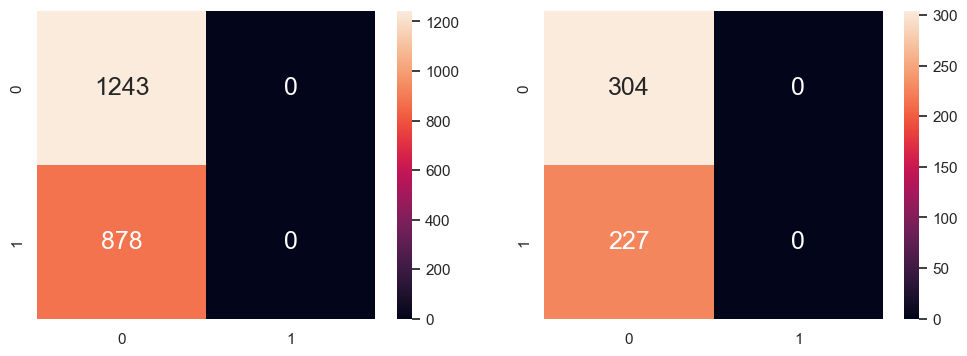

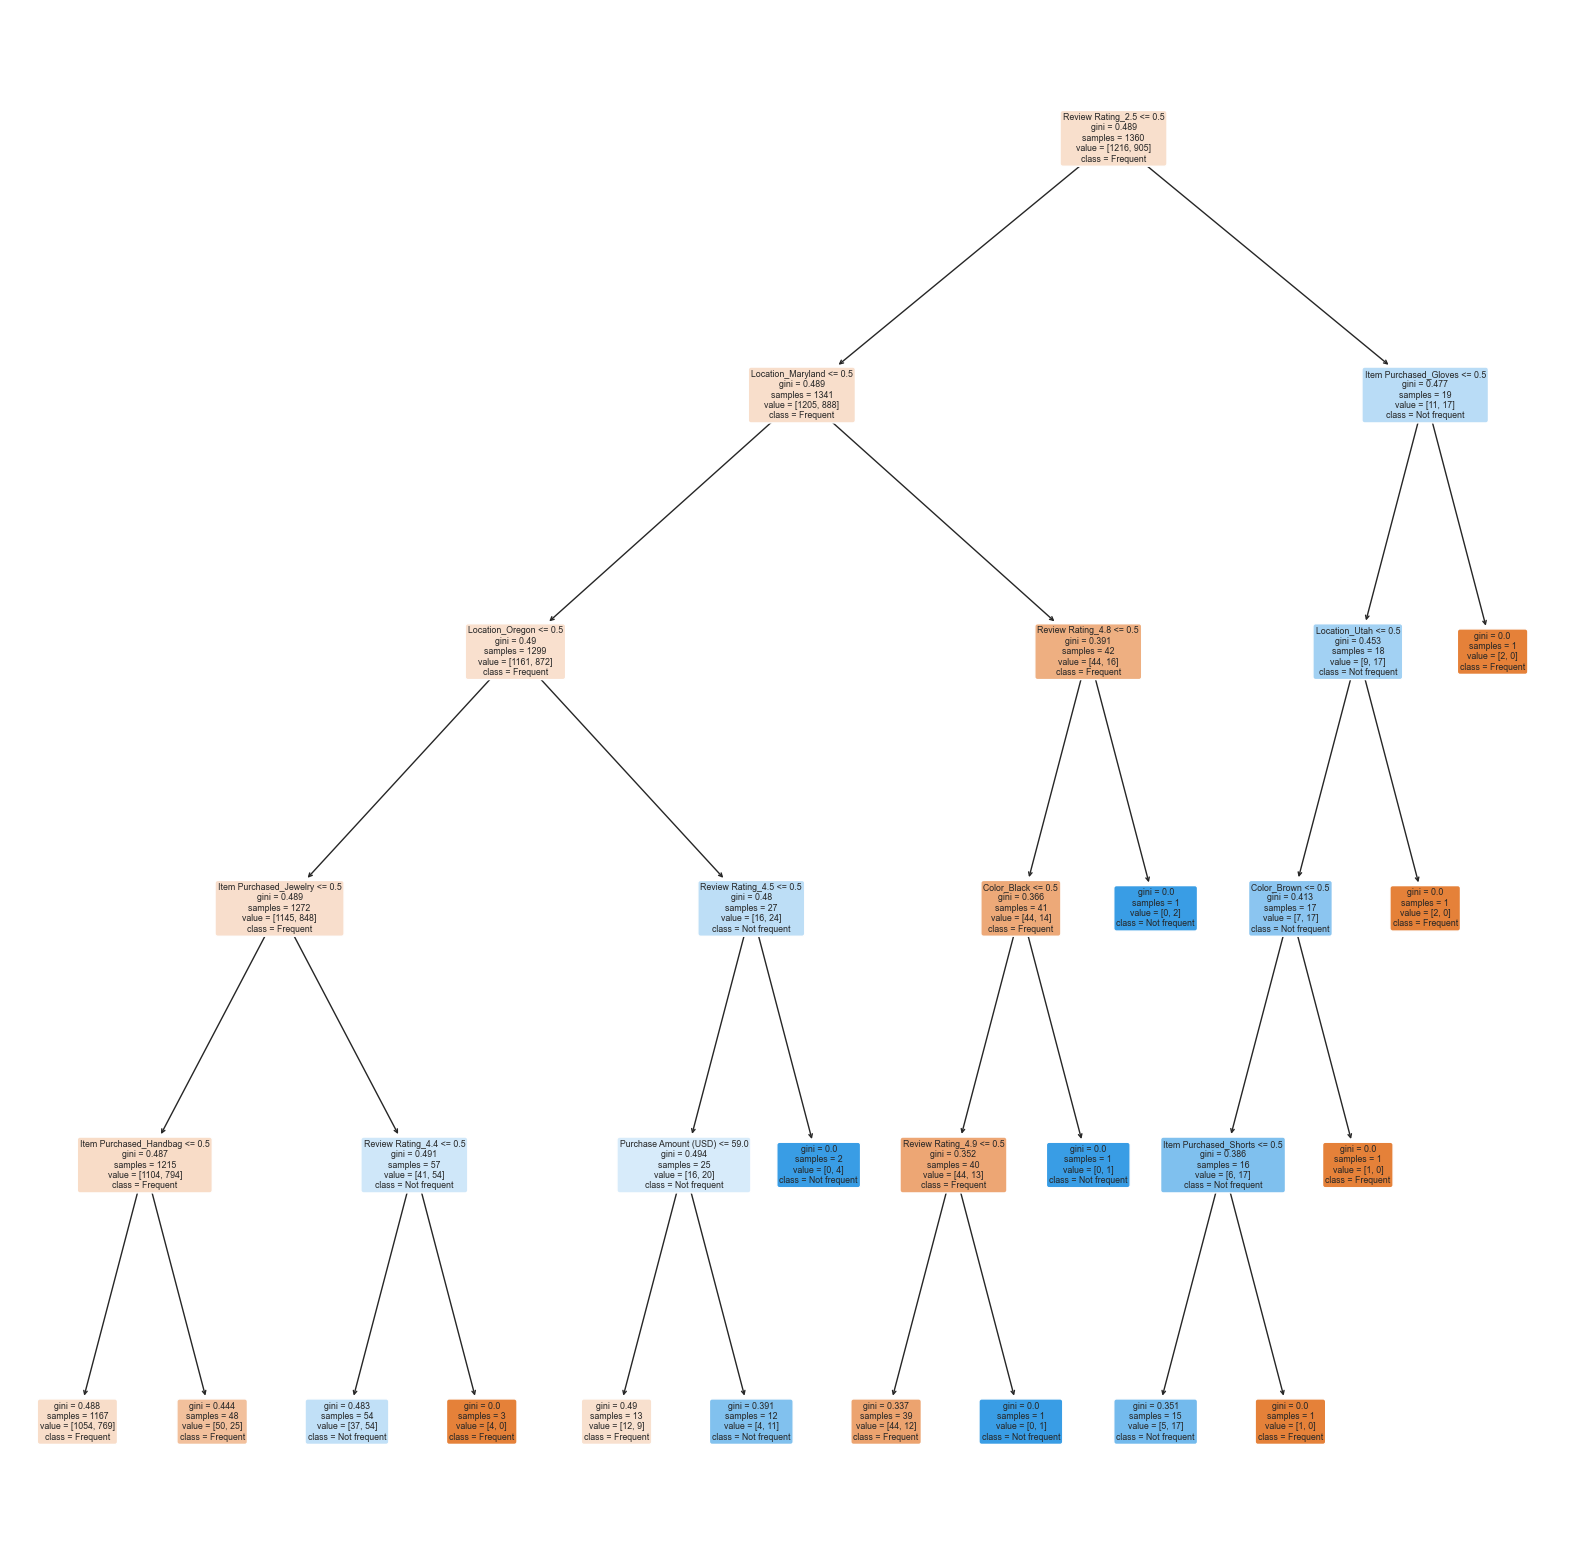

In [18]:
random_forest_male, X_train_male = random_forest_classifier(cleaned_df[cleaned_df['Gender_Male'] == True],0.20,200,5)

#### Random Forest Classification (Female)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7105139085337105

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6271186440677966



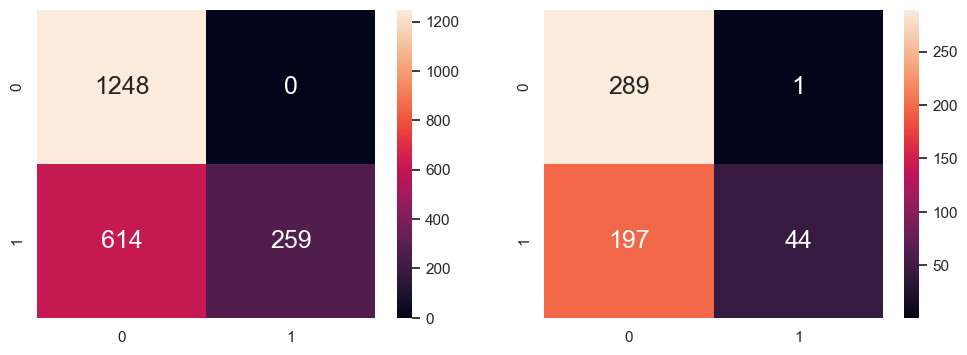

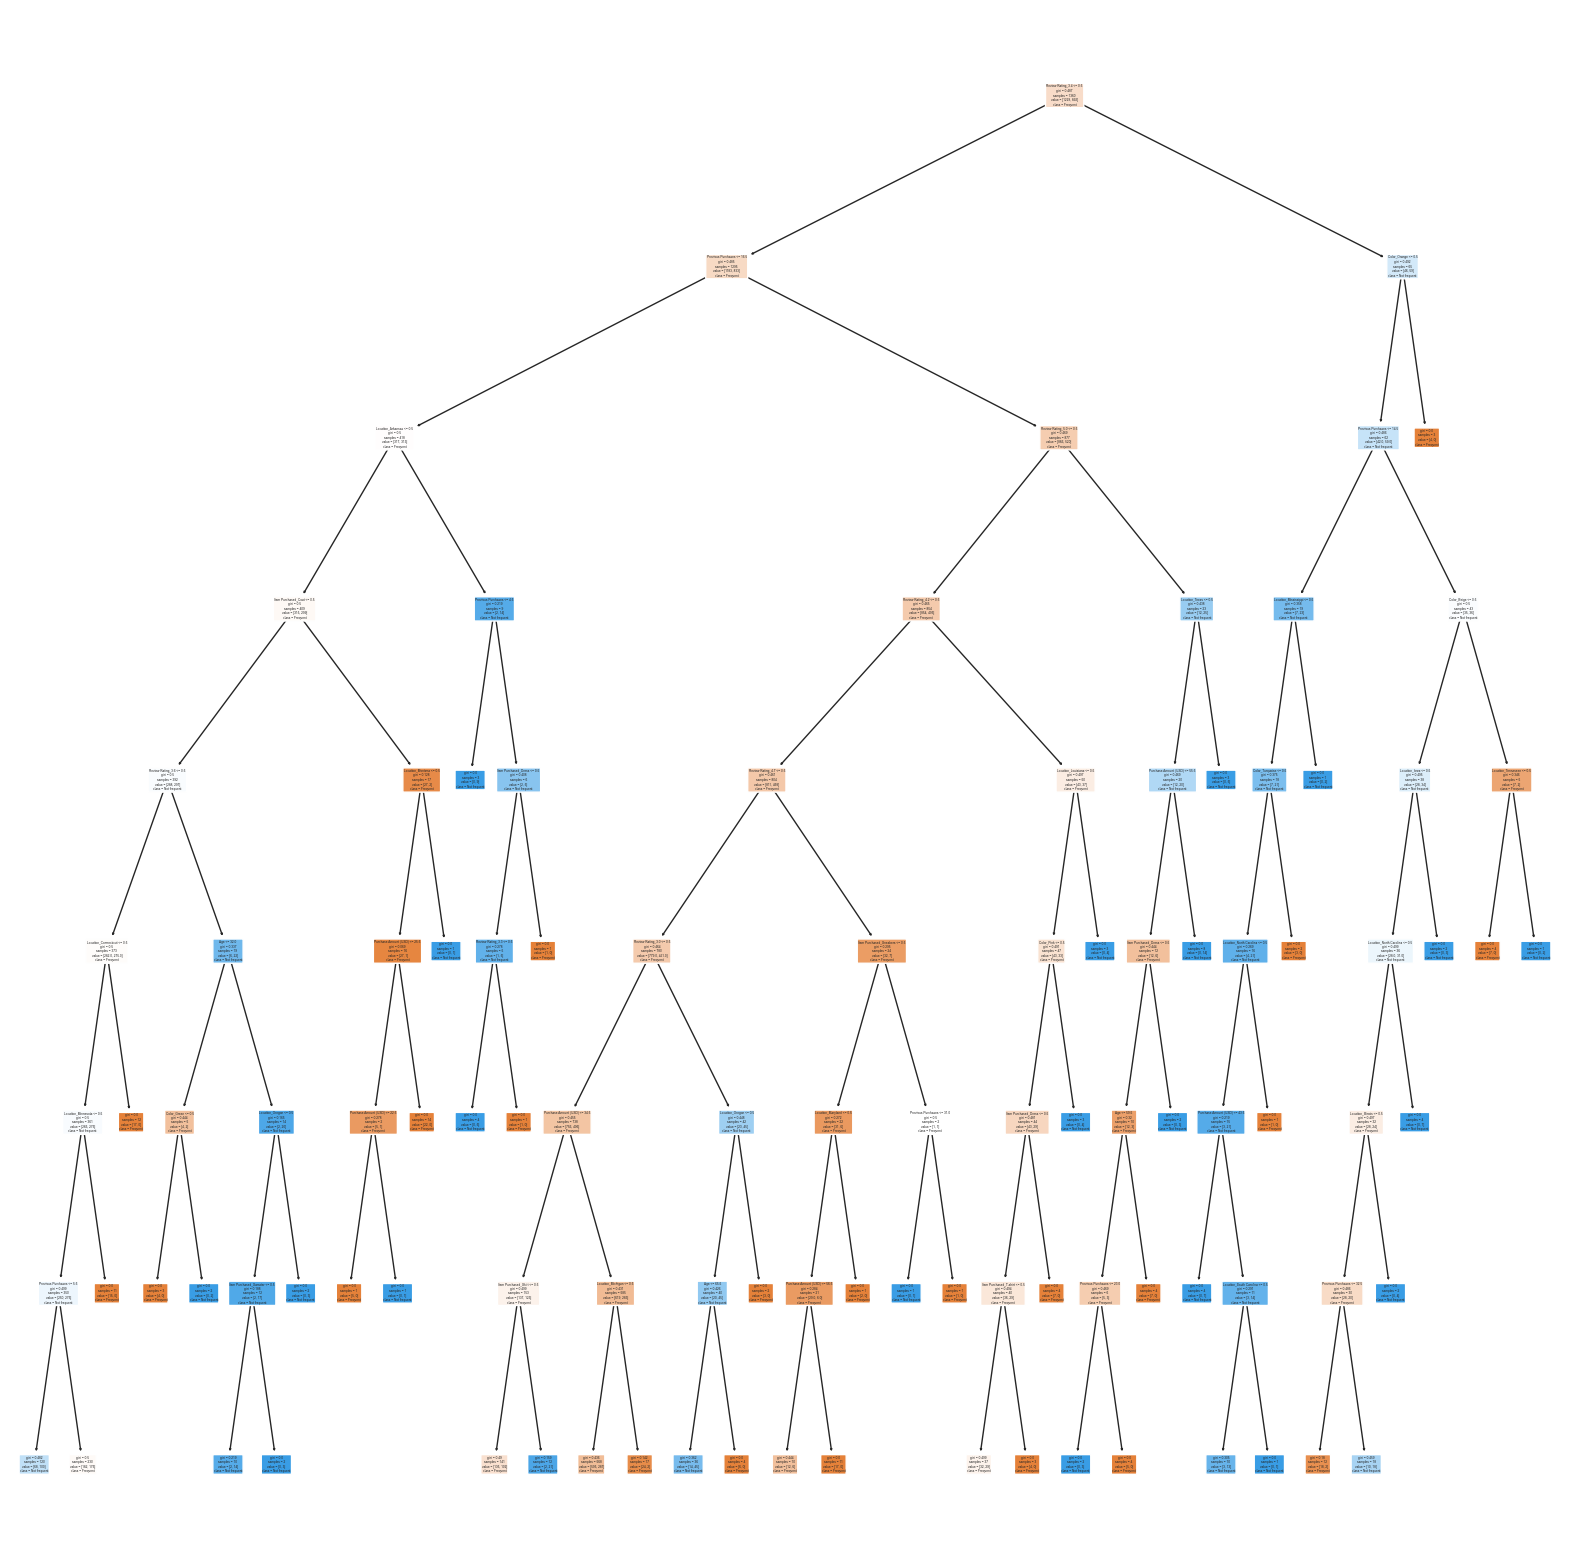

In [19]:
random_forest_female,X_train_female = random_forest_classifier(cleaned_df[cleaned_df['Gender_Male'] == False],0.20,200,8)

#### Decision Tree Classification (Male)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6638378123526638

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6101694915254238



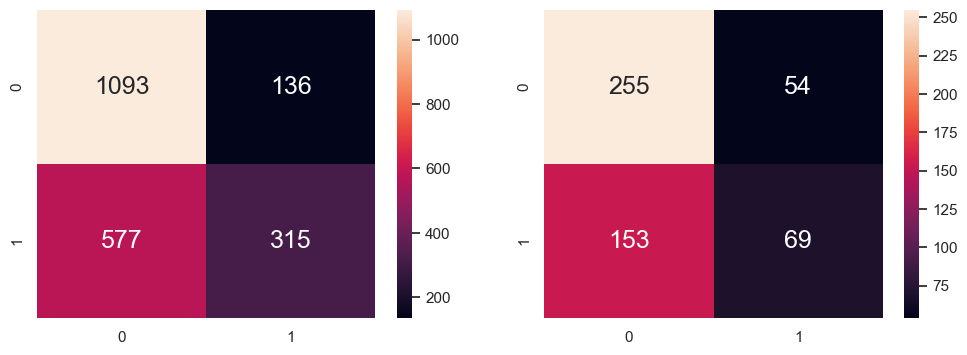

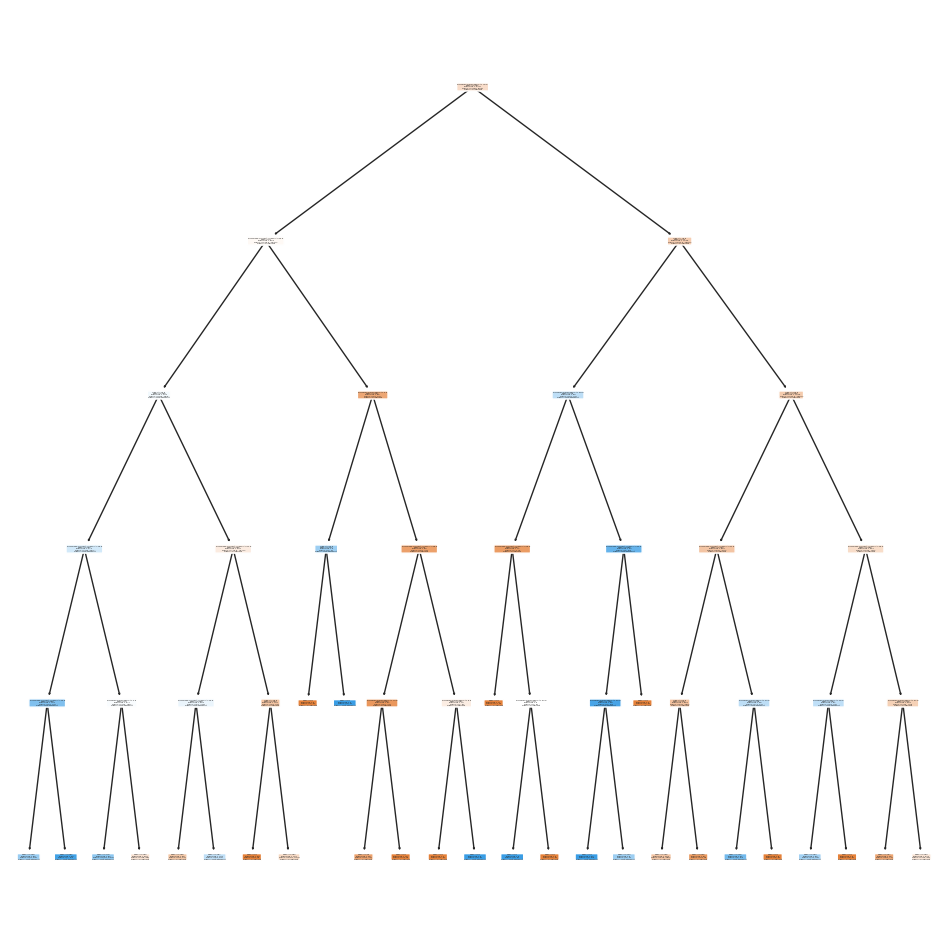

In [20]:
decision_tree_classifier(cleaned_df[cleaned_df['Gender_Male'] == False],0.20,5)

#### Decision Tree Classification (Female)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6496935407826497

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.615819209039548



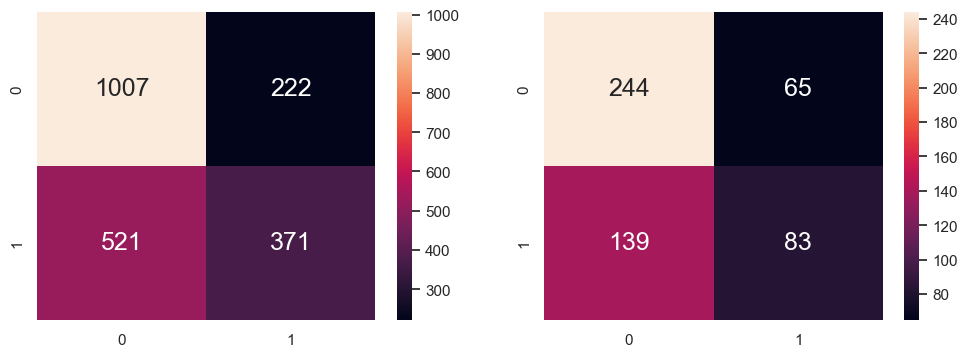

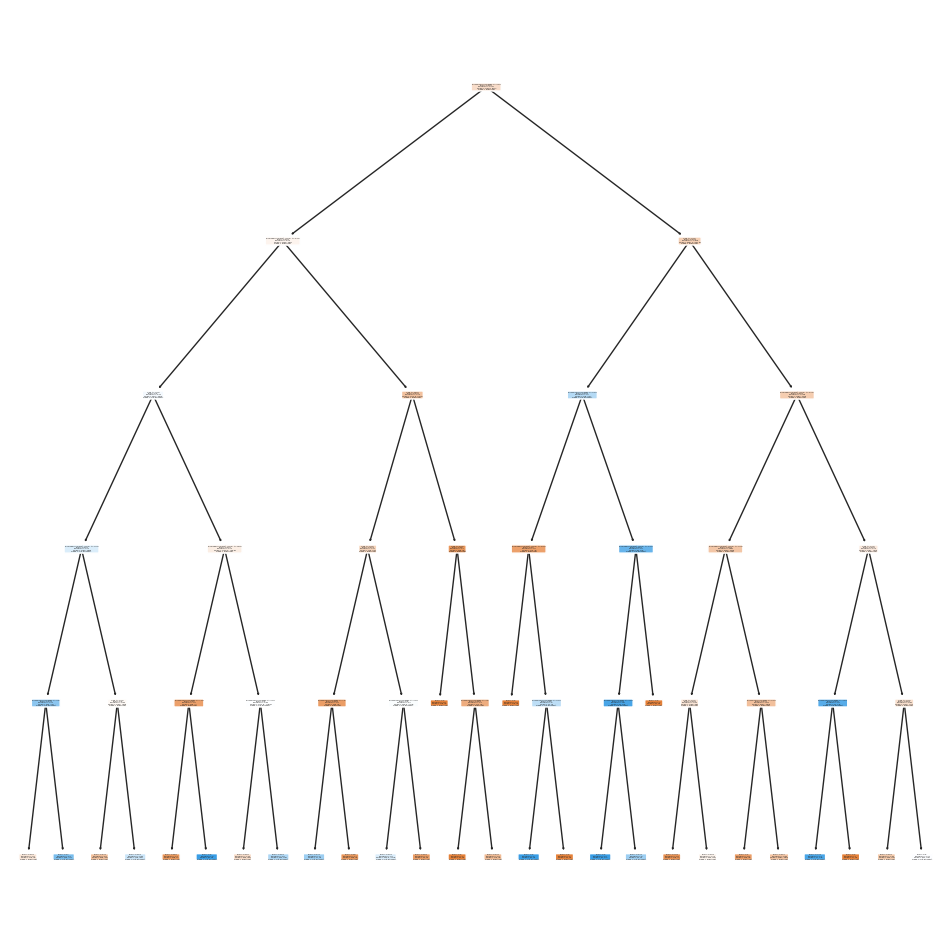

In [21]:
decision_tree_classifier(cleaned_df[cleaned_df['Gender_Male'] == False],0.20,5)

### 4c. Model Choice and Optimization 

For hyper tuning:

Decision Trees:
Adjusted the max_depth parameter to control the depth of the decision tree, preventing overfitting and improving generalization.
Tuned the train-test-split parameter to determine the minimum number of samples required to split an internal node, balancing model complexity and performance, with trail and error.


Random Forest:
Experimented with different values of n_estimators to find the optimal number of trees in the forest, balancing computational efficiency and model performance.
Adjusted the max_depth parameter for each individual tree in the forest to control the depth of the trees, preventing overfitting and improving generalization, with trail and error.


Purchase Amount (USD): 0.07723438647956643
Previous Purchases: 0.07178571509988992
Age: 0.06918765412613684
Location_Kansas: 0.02037309679876046
Location_Ohio: 0.019781551595292365
Review Rating_5.0: 0.01926015663960357
Color_White: 0.017264037852355956
Color_Indigo: 0.016415736590370933
Review Rating_2.9: 0.015774660828967745
Item Purchased_Sweater: 0.012691491650599155
Color_Violet: 0.01208248488283796
Location_Indiana: 0.011926788495986183
Item Purchased_Jeans: 0.011008568463646744
Location_Montana: 0.010857857805392883
Item Purchased_Boots: 0.010635758832997177
Item Purchased_Handbag: 0.010043235252031076
Item Purchased_Socks: 0.010008852706380295
Location_Rhode Island: 0.009681539637693486
Color_Turquoise: 0.009568214895551633
Review Rating_3.4: 0.009566070840359887
Item Purchased_Hoodie: 0.009452278563035987
Color_Green: 0.009275748851013158
Color_Gold: 0.009053530217403688
Item Purchased_Shirt: 0.008773781844804493
Location_Oregon: 0.008770119803713871
Color_Purple: 0.0085298424

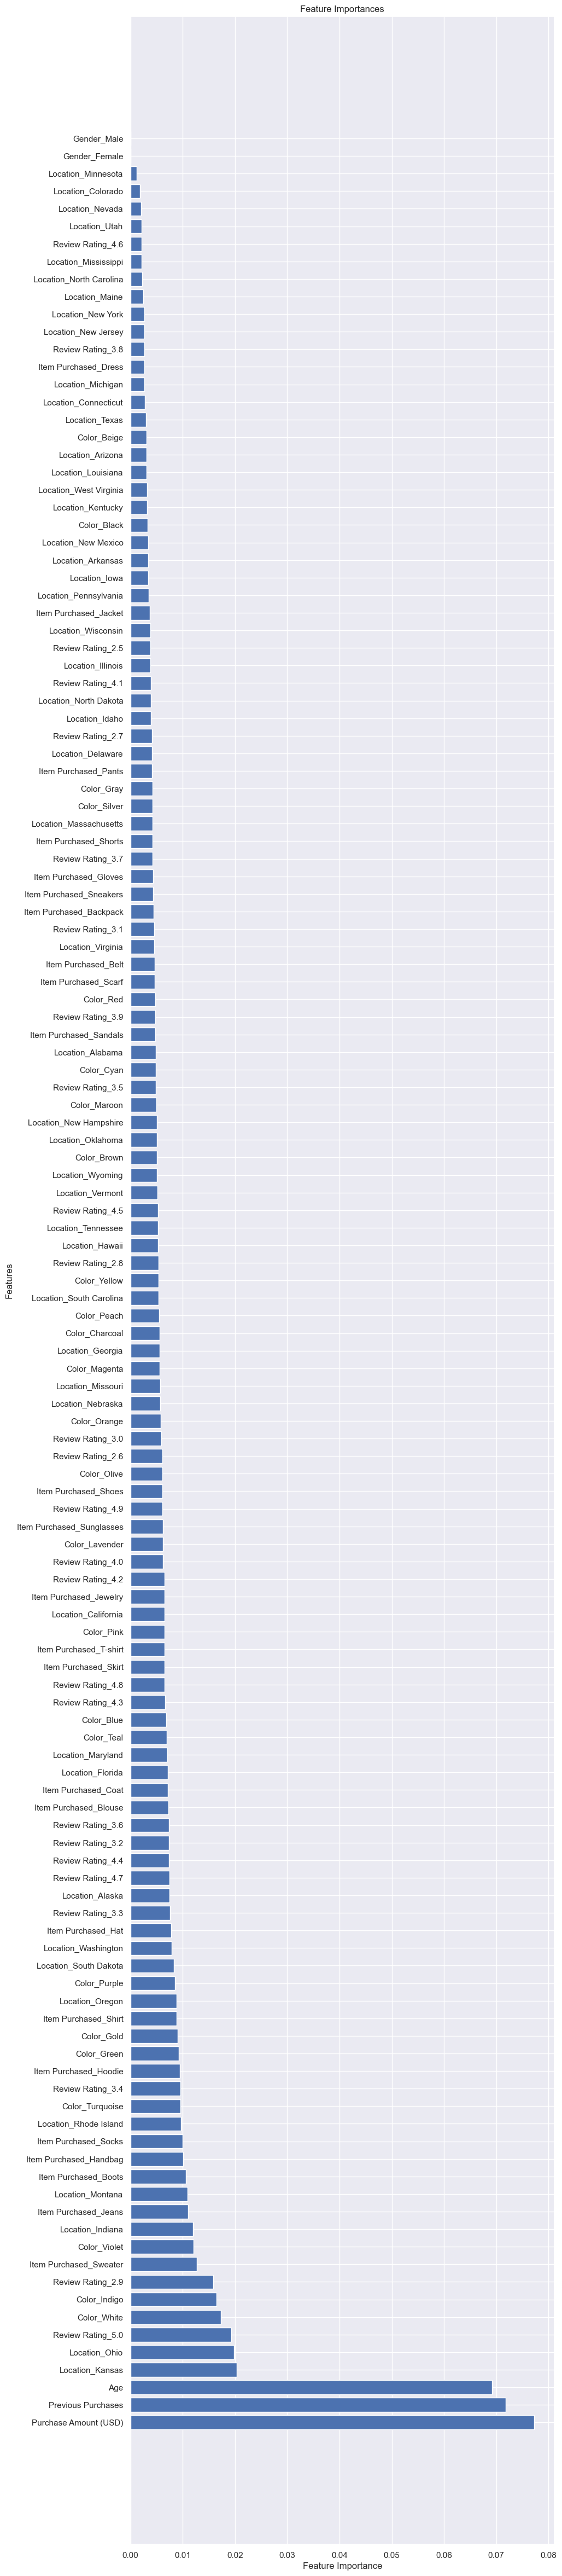

Location: 0.2657517546103599
Color: 0.17668287458526116
Review Rating: 0.17103901901810073
Item Purchased: 0.1683185960806851
Purchase Amount (USD): 0.07723438647956643
Previous Purchases: 0.07178571509988992
Age: 0.06918765412613684
Gender: 0.0


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

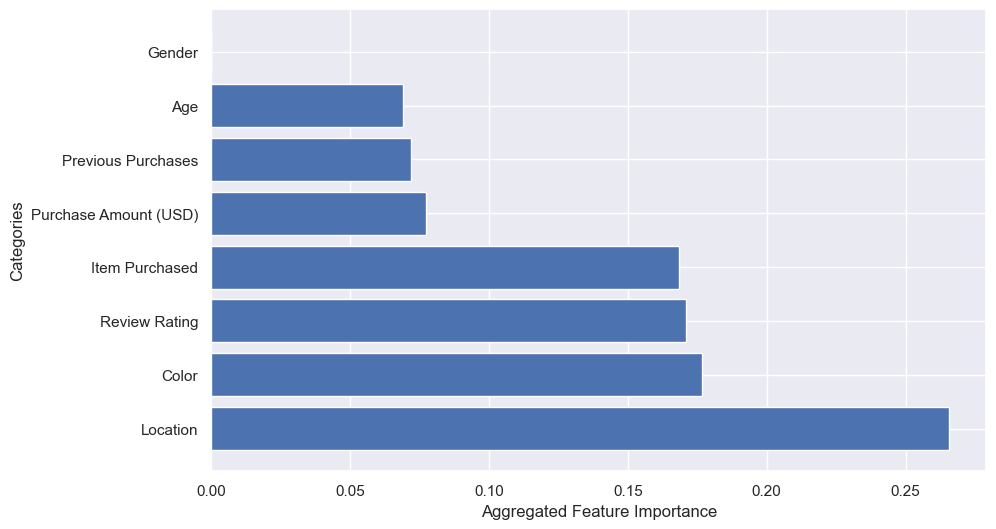

In [22]:
# Get feature importances from the trained Random Forest model
feature_importances = random_forest_male.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(X_train_male.columns, feature_importances))

# Sort feature importances by their values
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 60))
plt.barh(range(len(sorted_feature_importances)), [importance for feature, importance in sorted_feature_importances], align='center')
plt.yticks(range(len(sorted_feature_importances)), [feature for feature, importance in sorted_feature_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Initialize a dictionary to store aggregated feature importances
aggregated_feature_importances = {}

# Iterate through the columns of X_train to identify one-hot encoded variables
for column in X_train_male.columns:
    # Extract the category name
    category = column.split('_')[0]  #The format is 'Category_Column'
    
    # Check if the category exists in the aggregated dictionary
    if category not in aggregated_feature_importances:
        aggregated_feature_importances[category] = 0  # Initialize with 0 if not present
    
    # Add the feature importance to the aggregated value
    aggregated_feature_importances[category] += feature_importance_dict[column]

# Sort the aggregated feature importances by their values
sorted_aggregated_feature_importances = sorted(aggregated_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print aggregated feature importances
for category, importance in sorted_aggregated_feature_importances:
    print(f"{category}: {importance}")

# Plot aggregated feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_aggregated_feature_importances)), [importance for category, importance in sorted_aggregated_feature_importances], align='center')
plt.yticks(range(len(sorted_aggregated_feature_importances)), [category for category, importance in sorted_aggregated_feature_importances])
plt.xlabel('Aggregated Feature Importance')
plt.ylabel('Categories')
plt.title


Previous Purchases: 0.100218102711296
Age: 0.07540226174378199
Purchase Amount (USD): 0.0719884640551621
Location_Connecticut: 0.024481392866525967
Color_White: 0.022772292636150576
Review Rating_3.5: 0.019493334534508244
Review Rating_2.9: 0.01733622228594878
Location_Kentucky: 0.014960504650655864
Item Purchased_Scarf: 0.014087537341648016
Location_North Dakota: 0.013925403465029438
Color_Gray: 0.013788871607525328
Review Rating_3.0: 0.013338643050630485
Review Rating_3.6: 0.012884859147223045
Color_Blue: 0.012085851300139451
Item Purchased_Socks: 0.011584833074318455
Review Rating_3.1: 0.011068011742665038
Review Rating_5.0: 0.01106068355533767
Color_Black: 0.010573201338468025
Item Purchased_Coat: 0.010089268609022624
Item Purchased_Boots: 0.010002912733481327
Color_Green: 0.009010610885524161
Item Purchased_Sweater: 0.008410235563423825
Location_Alabama: 0.008321665216253214
Location_Maryland: 0.008300924092053472
Color_Cyan: 0.008277011403878744
Review Rating_4.5: 0.0081217749359

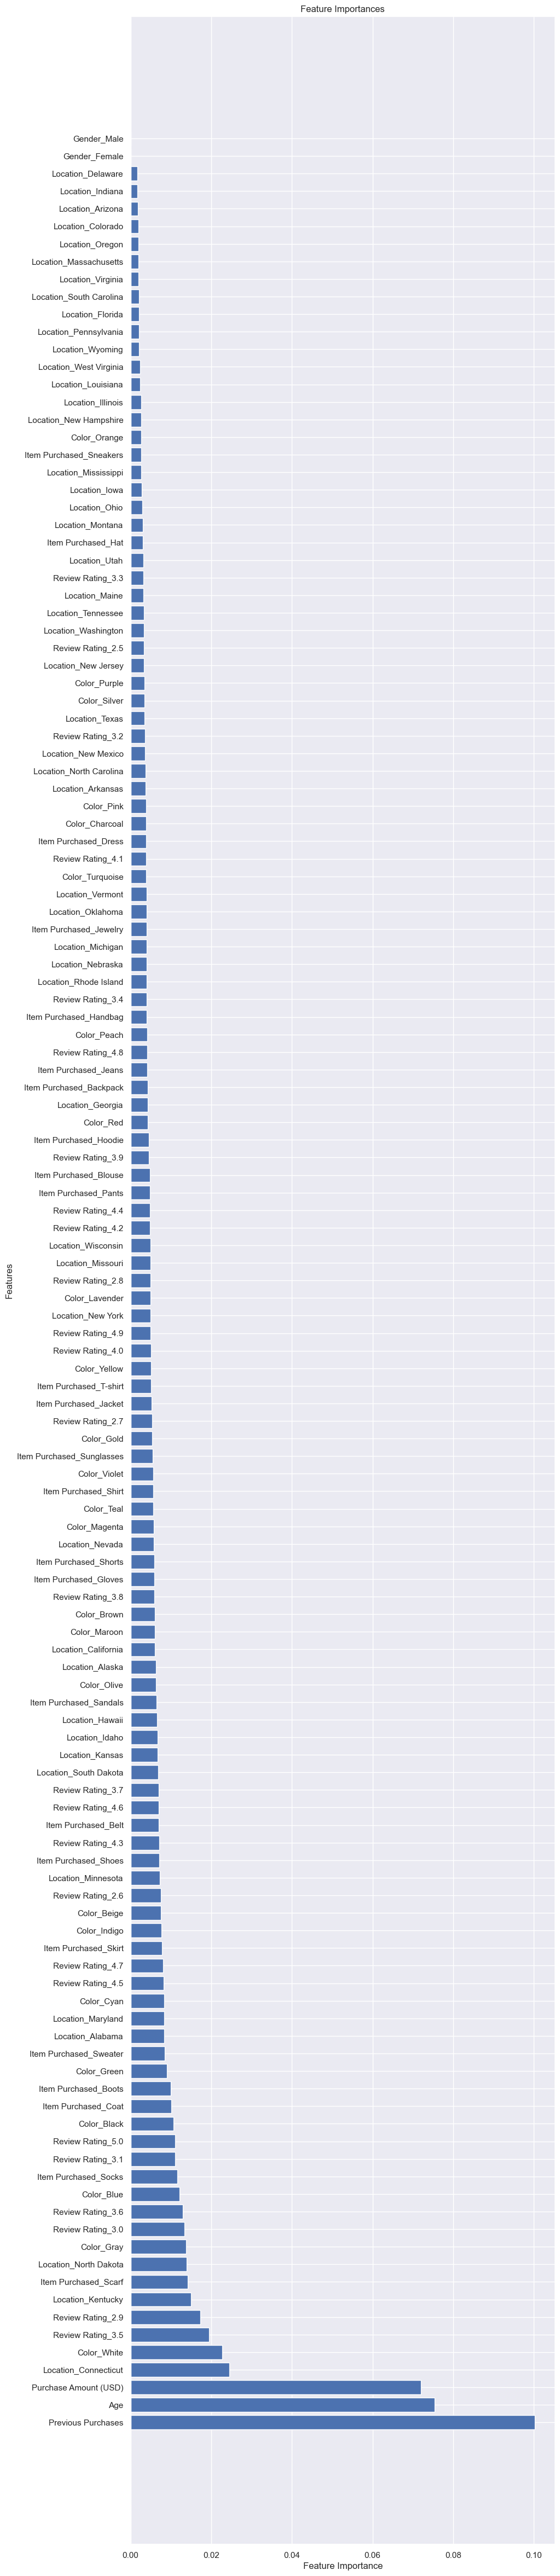

Location: 0.2340143755332369
Review Rating: 0.1918276938737675
Color: 0.17135204651569938
Item Purchased: 0.15519705556705626
Previous Purchases: 0.100218102711296
Age: 0.07540226174378199
Purchase Amount (USD): 0.0719884640551621
Gender: 0.0


<BarContainer object of 8 artists>

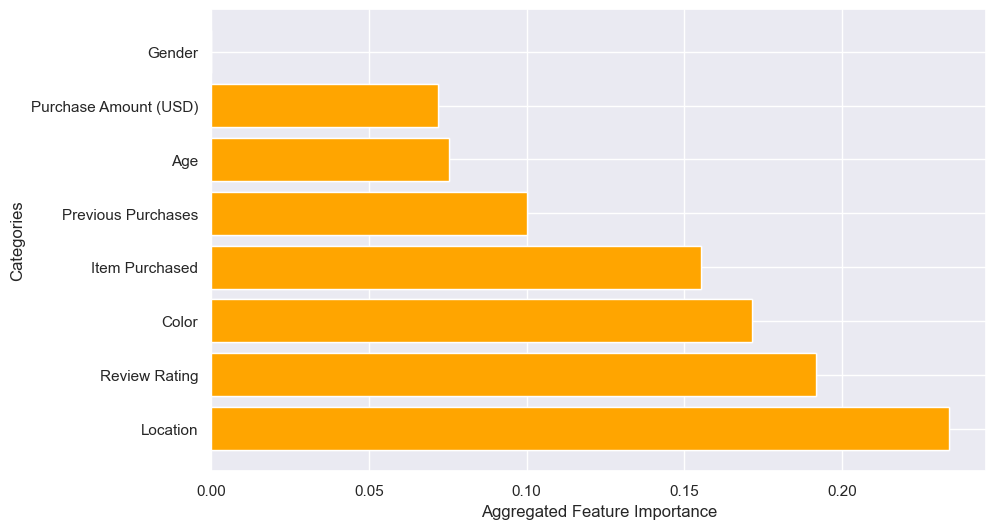

In [23]:
# Get feature importances from the trained Random Forest model
feature_importances = random_forest_female.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(X_train_female.columns, feature_importances))

# Sort feature importances by their values
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 60))
plt.barh(range(len(sorted_feature_importances)), [importance for feature, importance in sorted_feature_importances], align='center')
plt.yticks(range(len(sorted_feature_importances)), [feature for feature, importance in sorted_feature_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Initialize a dictionary to store aggregated feature importances
aggregated_feature_importances = {}

# Iterate through the columns of X_train to identify one-hot encoded variables
for column in X_train_female.columns:
    # Extract the category name
    category = column.split('_')[0]  #The format is 'Category_Column'
    
    # Check if the category exists in the aggregated dictionary
    if category not in aggregated_feature_importances:
        aggregated_feature_importances[category] = 0  # Initialize with 0 if not present
    
    # Add the feature importance to the aggregated value
    aggregated_feature_importances[category] += feature_importance_dict[column]

# Sort the aggregated feature importances by their values
sorted_aggregated_feature_importances = sorted(aggregated_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print aggregated feature importances
for category, importance in sorted_aggregated_feature_importances:
    print(f"{category}: {importance}")

# Plot aggregated feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_aggregated_feature_importances)), [importance for category, importance in sorted_aggregated_feature_importances], align='center')
plt.yticks(range(len(sorted_aggregated_feature_importances)), [category for category, importance in sorted_aggregated_feature_importances])
plt.xlabel('Aggregated Feature Importance')
plt.ylabel('Categories')
plt.title

plt.barh(range(len(sorted_aggregated_feature_importances)), [importance for category, importance in sorted_aggregated_feature_importances], align='center', color='orange')


### 5. Information Presentation
In this section we present the outcomes and conclusions, along with the experiemtned k-means clustering ML technique.
### 5a. Project Outcomes

Observations on Classification Models: 
In both Random FOrest Classification and Decision Tree Classification we observed that the model trained on a male dataframe generally had a lower overall (Both Test & Train) accuracy as compared to that of the female dataframe. This would suggest that the features in the female dataframe generally served as better predictors. The one caveat to this is that we also noticed that while the model trained on a male dataframe had a a similar or higher test accuracy as compared to train accuracy, the model trained on a female dataframe did not. This suggested that despite our attempts at data preparation through upsamping, the female dataset suffered from overfitting and as such was not as reliable against new data that was not within its train dataset.

As seen above, in both the model trained on both the male and female dataframe, we can observe that Location had the highest aggregated feature importance. Other important features identified by the algorithm are review rating, color, and item purchased. The less important variables are previous purchases, age and purchase amount. This suggests that location plays the highest role in determining weather or not a user is a frequent buyer. 

Sellers can then use this information to target specific audiences from that state (in the US), combining it with other factors such as making sure that they have good ratings, and stocking up the right colors.

### 5b. Interesting insights

We decided to experiment with K-Means clustering:

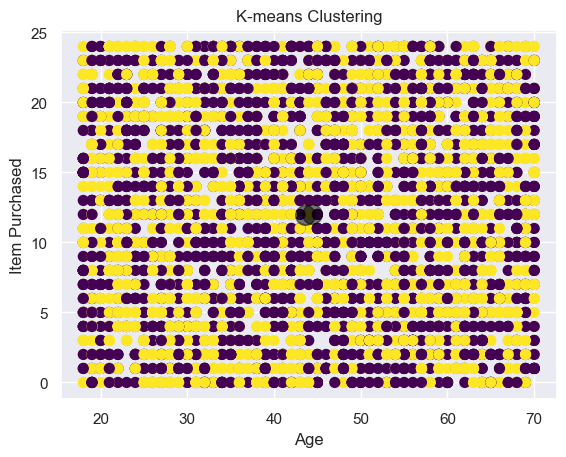

In Cluster 0, the dominant gender is Male
In Cluster 1, the dominant gender is Female


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df_resampled = df_resampled.drop(columns=['Customer ID'])

# Convert 'Frequency of Purchases' from object to boolean
df_resampled['Frequency of Purchases'] = df_resampled['Frequency of Purchases'].map({'True': True, 'False': False})

# Encode categorical variables
label_encoder = LabelEncoder()
for column in df_resampled.select_dtypes(include='object'):
    df_resampled[column] = label_encoder.fit_transform(df_resampled[column])

# Select features for clustering
features_for_clustering = df_resampled.drop(columns=['Gender'])  # Exclude 'Gender' column

# Perform K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(features_for_clustering)
cluster_labels = kmeans.labels_

# Visualize clusters
plt.scatter(features_for_clustering.iloc[:, 0], features_for_clustering.iloc[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel(features_for_clustering.columns[0])
plt.ylabel(features_for_clustering.columns[1])
plt.title('K-means Clustering')
plt.show()

# Analyze relationship between variables and gender
clustered_data = df_resampled.copy()
clustered_data['Cluster'] = cluster_labels
clustered_data.groupby('Cluster').mean()['Gender']

# Calculate proportion of each gender in each cluster
gender_proportions = clustered_data.groupby('Cluster')['Gender'].value_counts(normalize=True)

# Find out which label corresponds to which gender
for cluster in gender_proportions.index.levels[0]:
    if gender_proportions[cluster][0] > gender_proportions[cluster][1]:
        dominant_gender = 'Male'
    else:
        dominant_gender = 'Female'
    print(f"In Cluster {cluster}, the dominant gender is {dominant_gender}")





g. 
It groups datasets based on similarities among data points.

Our intention was to find out that amongst all the variables besides customer ID. What is the fender distribution in each cluster?

This will give us an insight on the dominant gender that uses online shopping platform.

We found out that the dominant gender in both the clusters .

It is observed from our K-Means clustering that our demographic of online shoppers leans towards female consumers as compared to males in this particular dataset.are females

### 5c. Reccomendations and viewpoints

We would recommend to e-commerce platforms the use of classifiers as a valuable tool for improving the marketing strategies. It helps marketers to understand the key factors influencing customer behavior and segmentation. This understanding can aid in tailoring marketing campaigns and targeting specific customer segments effectively. In our scenario we determined that the female consumers had not been sufficiently targetted as despite showing the highest variance in features and preferences. We would recommend the use of random forest classification as it might be a preferable choice due to its predictive performance and ability to handle a large number of features and the complex relationships in the data. By leveraging random forests, e-commerce platforms can build robust predictive models to optimize marketing efforts, personalize recommendations, forecast customer behavior, and enhance overall user experience.